In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import os, sys
sys.path.insert(0, '.')
sys.path.insert(1, '..')
print(os.getcwd())
os.chdir('/Users/kiennd/git/searchable-encryption')
print(os.getcwd())

plt.rc('font', family='serif')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


/Users/kiennd/git/searchable-encryption/notebooks
/Users/kiennd/git/searchable-encryption


In [2]:
# benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted = 'benchmark/benchmark_gowalla_LA_hxt_checkins_cells.csv'
benchmark_gowalla_LA_hxt_checkins_cells_parallel_file = 'benchmark/benchmark_gowalla_LA_hxt_checkins_cells_parallel.csv'
# benchmark_gowalla_LA_hxt_converted_from_hve_brc = 'benchmark/benchmark_gowalla_LA_hxt_converted_from_hve.csv'
# benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted = 'benchmark/benchmark_gowalla_LA_hxt_gen_index_seq.csv'
benchmark_gowalla_LA_hxt_gen_index_parallel_file = 'benchmark/benchmark_gowalla_LA_hxt_gen_index_parallel.csv'

# benchmark_gowalla_LA_hve = 'benchmark/benchmark_gowalla_LA_hve_100_10.csv' # this is for matching [x, y] => 5 pairings
benchmark_gowalla_LA_hve = 'benchmark/benchmark-hve-concat/benchmark_gowalla_LA_hve_100_checkins_10_queries.csv' # this is for matching [xy] => 3 pairings

benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted.csv'
benchmark_gowalla_LA_hxt_converted_from_hve_brc = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_converted_from_hve_brc.csv'
benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted.csv'
benchmark_gowalla_LA_hxt_gen_index_seq_brc = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_gen_index_seq_brc.csv'



In [3]:
import numpy as np
import pandas as pd

## Average Query Time HXT (Arbitrary query location)

<IPython.core.display.Javascript object>


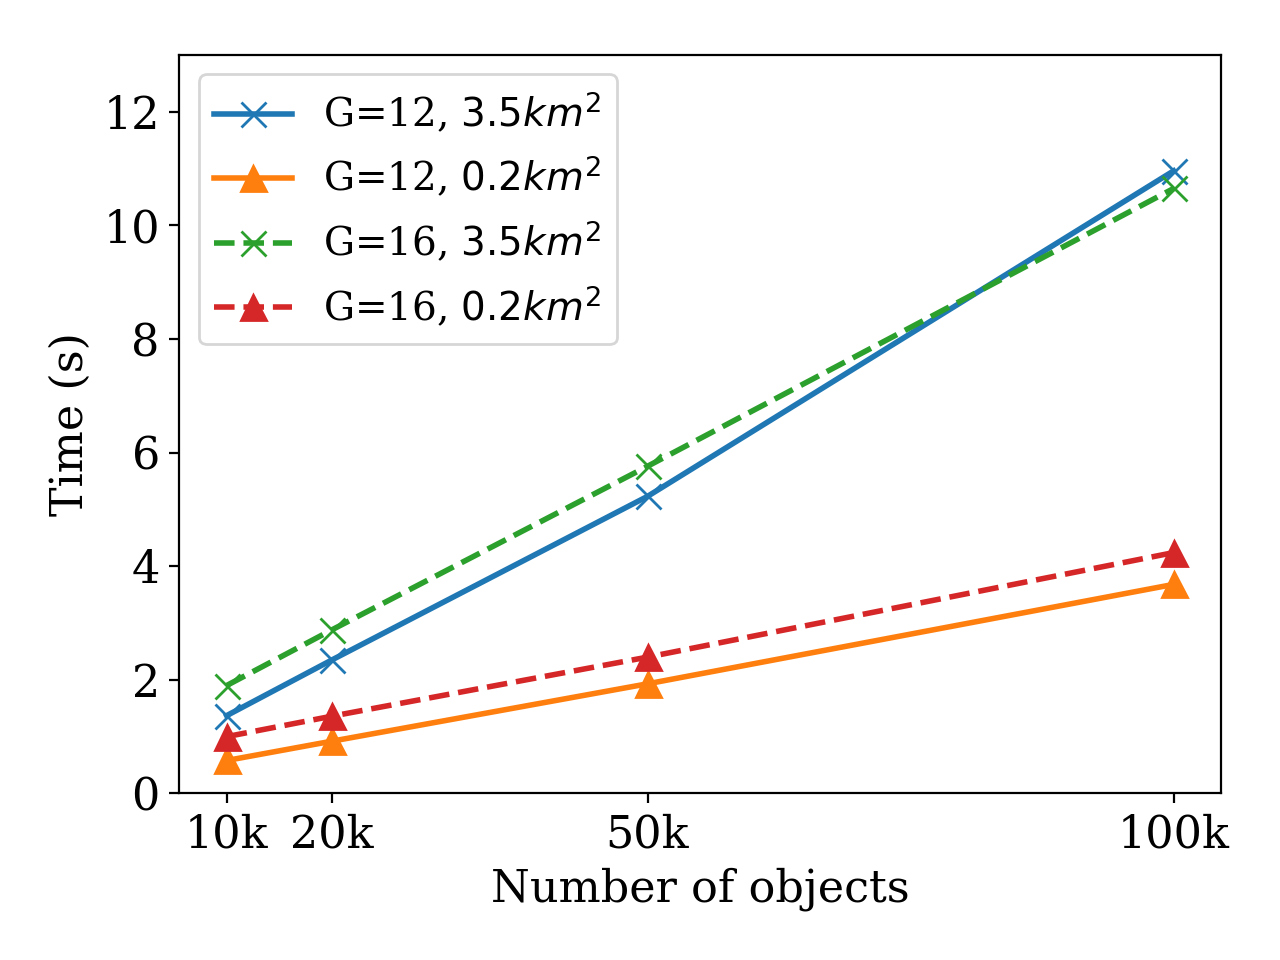

In [4]:
df_gowalla_LA_hxt_converted_from_hve_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted, delimiter='\t', index_col=False)

index_limit_level = 0
num_checkins = [10000, 20000, 50000, 100000]
num_checkins_label = ['10k', '20k', '50k', '100k']


widths = [2**12, 2**16]
linestyles = [ '-', '--']
# widths = [2**10, 2**12, 2**14, 2**16]
# linestyles = [ ':', '--', '-', '-.']

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
# query_levels = [5, 6, 7]
query_sizes = ['$3.5km^2$', '$0.2km^2$']
query_levels = [5, 7]
markers = ['x', '^', 's']
    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    for ql_i in range(len(query_levels)):
        query_level = query_levels[ql_i]
        query_size = query_sizes[ql_i]
        marker = markers[ql_i]
        
        data = df_gowalla_LA_hxt_converted_from_hve_brc_shifted
        data = data[data.width == width]
        data = data[data.query_level == query_level]
        data = data[data.index_limit_level == index_limit_level]
        label = 'G={0}, {1}'.format(width.bit_length() - 1, query_size)
        plt.plot(num_checkins, data['avg_time'], ls + marker, label=label, markersize=9, linewidth=2)
axes = plt.gca()
axes.set_ylim([0, 13])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.xticks(num_checkins, num_checkins_label)
plt.legend(loc=2, ncol=1)
plt.tight_layout()
# plt.title('HXT Average query time\nArbitrary query location')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_query_time_arbitrary.eps')
plt.savefig('benchmark/charts/hxt_avg_query_time_arbitrary.pdf')

## Average Query Time HXT (Query at nodes of the trees)

<IPython.core.display.Javascript object>


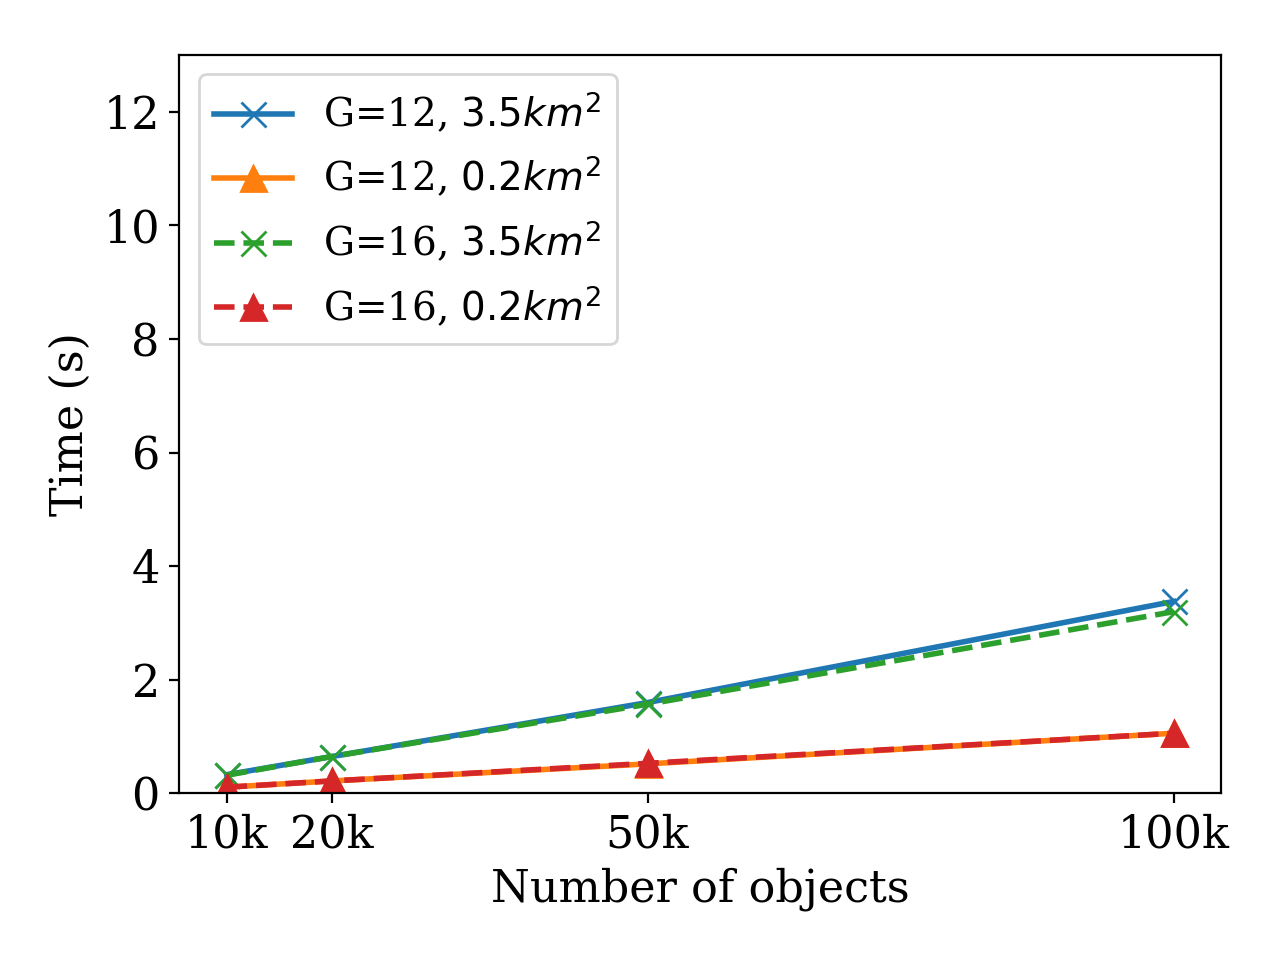

In [5]:
df_gowalla_LA_hxt_converted_from_hve_brc = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc, delimiter='\t', index_col=False)

index_limit_level = 0
num_checkins = [10000, 20000, 50000, 100000]

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
widths = [2**12, 2**16]
linestyles = [ '-', '--']
# linestyles = [ ':', '--', '-', '-.']

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
# query_levels = [5, 6, 7]
query_sizes = ['$3.5km^2$', '$0.2km^2$']
query_levels = [5, 7]
markers = ['x', '^', 's']
    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    
    for ql_i in range(len(query_levels)):
        query_level = query_levels[ql_i]
        query_size = query_sizes[ql_i]
        marker = markers[ql_i]
        
        data = df_gowalla_LA_hxt_converted_from_hve_brc
        data = data[data.width == width]
        data = data[data.query_level == query_level]
        data = data[data.index_limit_level == index_limit_level]
        label = 'G={0}, {1}'.format(width.bit_length()-1, query_size)
        plt.plot(num_checkins, data['avg_time'], ls + marker, label=label, markersize=9, linewidth=2)
# hve
#plt.plot(num_checkins,  [n * hve_avg_time for n in num_checkins], '-.*', label='HVE')
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 13])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.xticks(num_checkins, num_checkins_label)
plt.legend(loc=2, ncol=1)
plt.tight_layout()
# plt.title('HXT Average query time\nQuery at nodes of the trees')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_query_time_nodes.eps')
plt.savefig('benchmark/charts/hxt_avg_query_time_nodes.pdf')

## HXT Alignment Gain

In [6]:
df_gowalla_LA_hxt_converted_from_hve_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted, delimiter='\t', index_col=False)
df_gowalla_LA_hxt_converted_from_hve_brc = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc, delimiter='\t', index_col=False)

index_limit_level = 0
num_checkins = [10000, 20000, 50000, 100000]

widths = [2**10, 2**12, 2**14, 2**16]

query_levels = [5, 6, 7]
    
min_gain = 10000000
max_gain = -1000000

for w_i in range(len(widths)):
    width = widths[w_i]
    for ql_i in range(len(query_levels)):
        query_level = query_levels[ql_i]
        
        for n in num_checkins:
            data = df_gowalla_LA_hxt_converted_from_hve_brc_shifted
            data = data[data.width == width]
            data = data[data.query_level == query_level]
            data = data[data.index_limit_level == index_limit_level]
            data = data[data.n_checkins == n]

            data1 = df_gowalla_LA_hxt_converted_from_hve_brc
            data1 = data1[data1.width == width]
            data1 = data1[data1.query_level == query_level]
            data1 = data1[data1.index_limit_level == index_limit_level]
            data1 = data1[data1.n_checkins == n]


            gain = data['avg_time'] / data1['avg_time']
            min_gain = min(min_gain, gain.values[0])
            max_gain = max(max_gain, gain.values[0])
            print(type(gain))
            print(gain)
print(min_gain)
print(max_gain)

<class 'pandas.core.series.Series'>
11     3.606061
203         NaN
215         NaN
227         NaN
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
23    3.323077
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
35    3.08642
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
47    3.049536
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
10     3.833333
202         NaN
214         NaN
226         NaN
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
22    3.457143
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
34    3.172414
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
46    3.104046
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
9      3.636364
201         NaN
213         NaN
225         NaN
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'>
21    3.136364
Name: avg_time, dtype: float64
<class 'pandas.core.series.Series'

## HXT Index Build Time

<IPython.core.display.Javascript object>


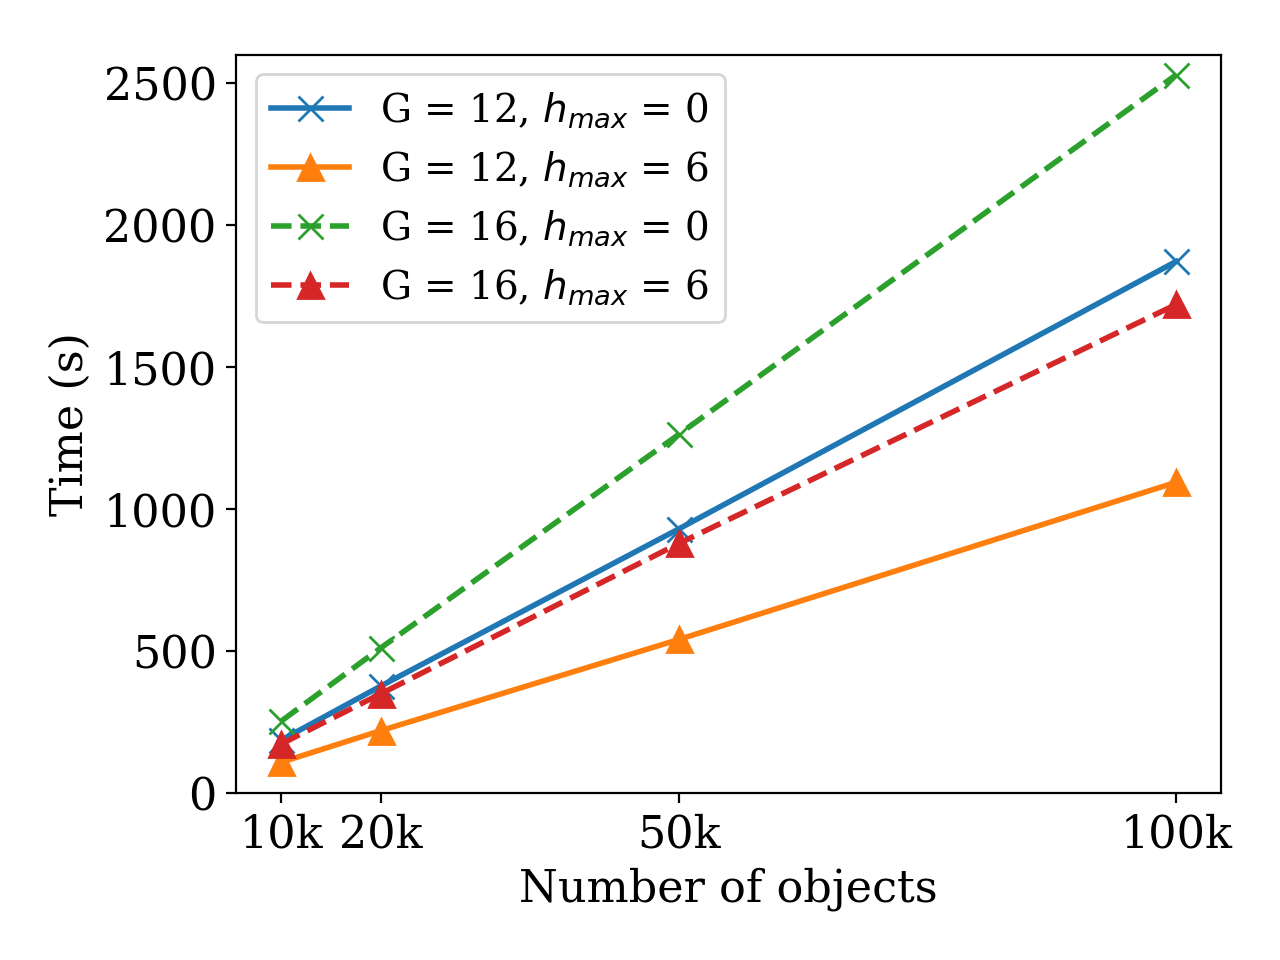

In [7]:
df_gowalla_LA_hxt_gen_index_seq_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted, delimiter='\t', index_col=False)

num_checkins = [10000, 20000, 50000, 100000]
num_checkins_label = ['10k', '20k', '50k', '100k']

# index_limit_levels = [0, 5, 6, 7]
index_limit_levels = [0, 6]
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
widths = [2**12, 2**16]
# widths = [2**10]
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']

    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        data = df_gowalla_LA_hxt_gen_index_seq_brc_shifted
        data = data[data.width == width]
        data = data[data.index_limit_level == index_limit_level]
        label = 'G = {0}, $h_{{max}}$ = {1}'.format(width.bit_length()-1, index_limit_level)
        plt.plot(num_checkins, data['total_time'], ls + marker, label=label, markersize=9, linewidth=2)
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 2600])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.xticks(num_checkins, num_checkins_label)
plt.legend(loc=2, ncol=1)
plt.tight_layout()
# plt.title('HXT Index Build time')
plt.show()
plt.savefig('benchmark/charts/hxt_index_build_time.eps')
plt.savefig('benchmark/charts/hxt_index_build_time.pdf')

## HXT Index Size

<IPython.core.display.Javascript object>


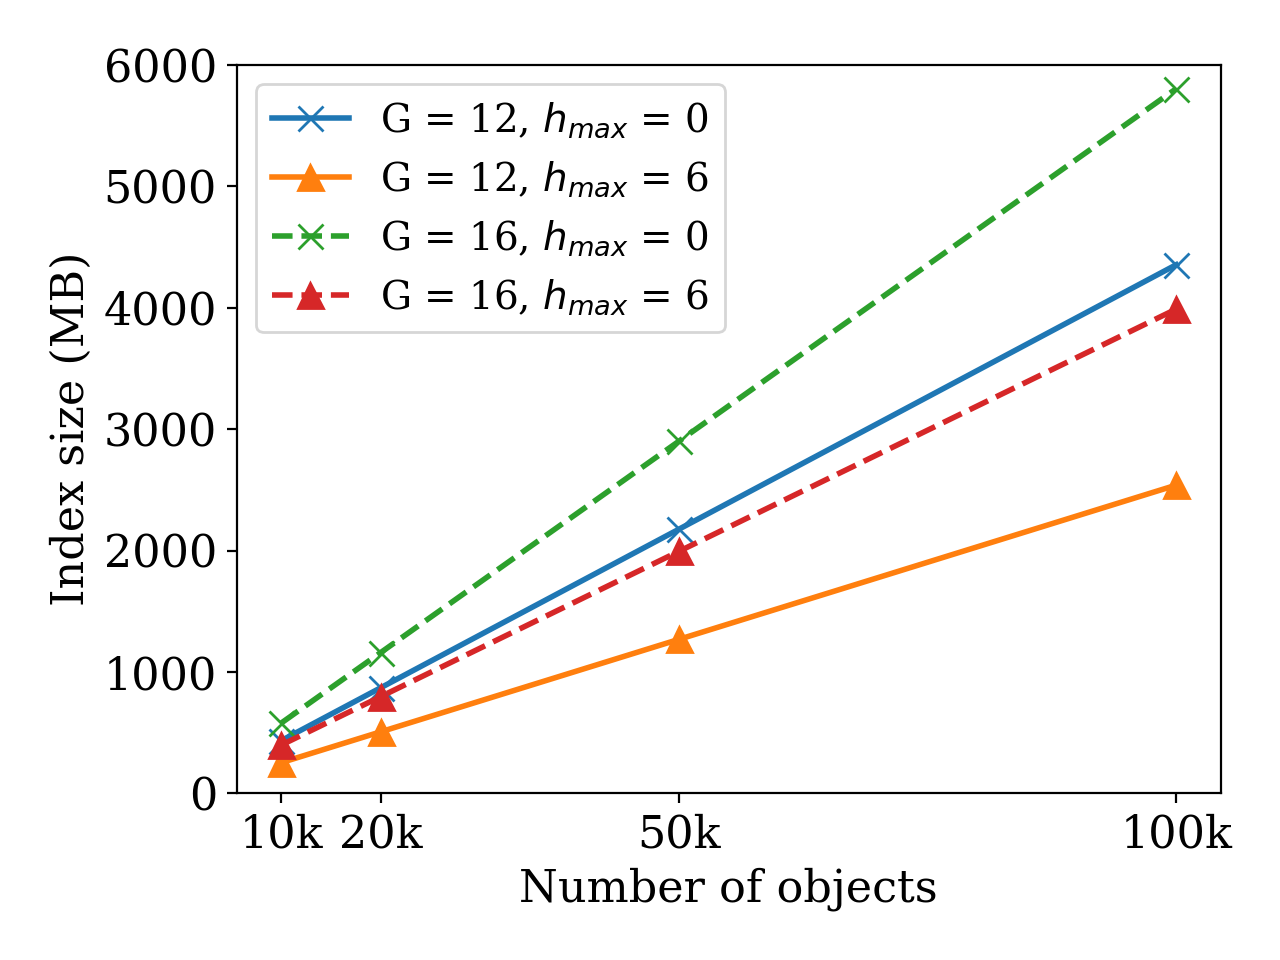

In [18]:
df_gowalla_LA_hxt_gen_index_seq_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted, delimiter='\t', index_col=False)

bytes_per_mb = 2 ** 20

num_checkins = [10000, 20000, 50000, 100000]
num_checkins_label = ['10k', '20k', '50k', '100k']

# index_limit_levels = [0, 5, 6, 7]
index_limit_levels = [0, 6]
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
widths = [2**12, 2**16]
# widths = [2**10]
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']
    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        data = df_gowalla_LA_hxt_gen_index_seq_brc_shifted
        data = data[data.width == width]
        data = data[data.index_limit_level == index_limit_level]
        data = data['total_size'] / bytes_per_mb
        label = 'G = {0}, $h_{{max}}$ = {1}'.format(width.bit_length()-1, index_limit_level)
        plt.plot(num_checkins, data, ls + marker, label=label, markersize=9, linewidth=2)
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 6000])
plt.xlabel('Number of objects')
plt.ylabel('Index size (MB)')
plt.legend(loc=2, ncol=1)
plt.xticks(num_checkins, num_checkins_label)
# plt.title('HXT Index Size')
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hxt_index_size.eps')
plt.savefig('benchmark/charts/hxt_index_size.pdf')

## HXT Seq vs Parallel Index Time

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<IPython.core.display.Javascript object>


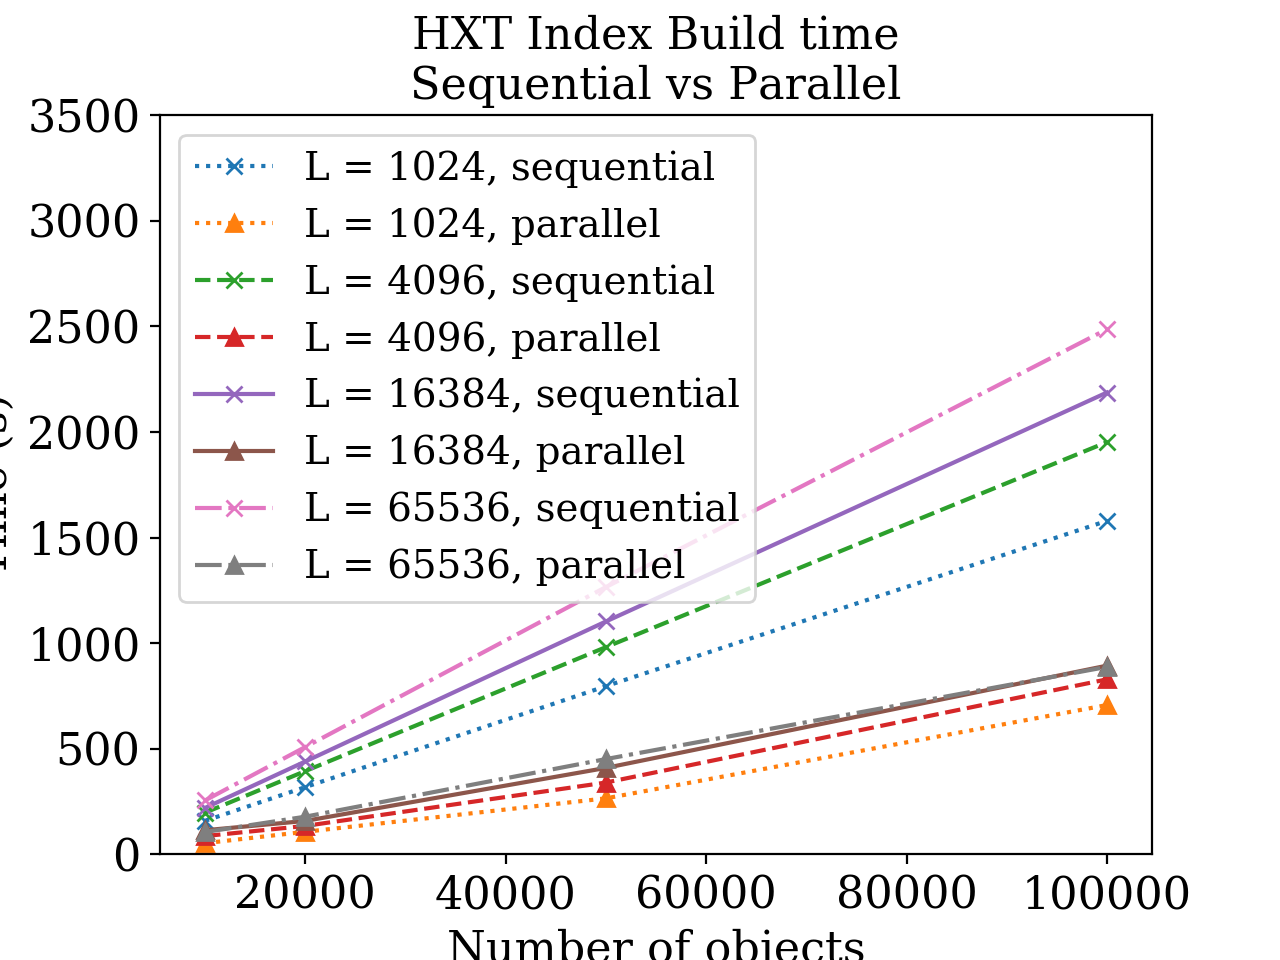

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [12]:
bm_hxt_gen_index_seq = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted, delimiter='\t', index_col=False)
bm_hxt_gen_index_parallel = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_parallel_file, delimiter='\t', index_col=False)

num_checkins = [10000, 20000, 50000, 100000]

index_limit_level = 0
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
widths = [2**10, 2**12, 2**14, 2**16]
# widths = [2**10]
linestyles = [ ':', '--', '-', '-.']

    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    marker = markers[0]
        
    data = bm_hxt_gen_index_seq[bm_hxt_gen_index_seq.width == width]
    data = data[bm_hxt_gen_index_seq.index_limit_level == index_limit_level]
    label = 'L = {0}, sequential'.format(width, index_limit_level)
    plt.plot(num_checkins, data['total_time'], ls + marker, label=label)
    
    marker = markers[1]
        
    data2 = bm_hxt_gen_index_parallel[bm_hxt_gen_index_parallel.width == width]
    data2 = data2[bm_hxt_gen_index_parallel.index_limit_level == index_limit_level]
    label = 'L = {0}, parallel'.format(width, index_limit_level)
    plt.plot(num_checkins, data2['total_time'], ls + marker, label=label)
    
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 3500])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.legend(loc=2)
plt.title('HXT Index Build time\nSequential vs Parallel')
plt.show()
plt.savefig('benchmark/charts/hxt_seq_parallel_index_build_time.pdf')

## HXT Seq vs Parallel Query Time

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<IPython.core.display.Javascript object>


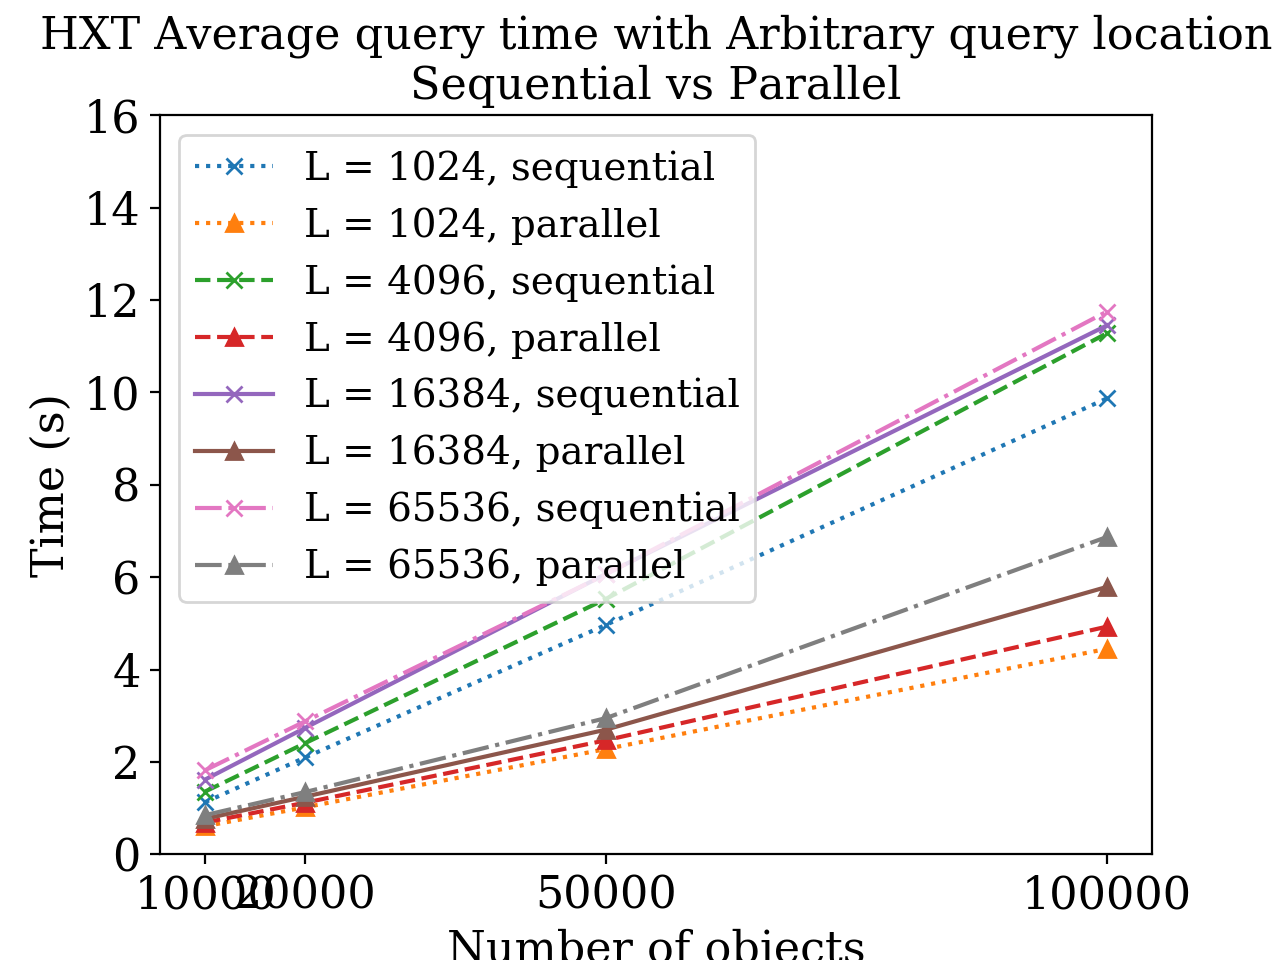

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [13]:
bm_hxt_checkins_cells_seq = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted, delimiter='\t', index_col=False)
bm_hxt_checkins_cells_parallel = pd.read_csv(benchmark_gowalla_LA_hxt_checkins_cells_parallel_file, delimiter='\t', index_col=False)

index_limit_level = 0
num_checkins = [10000, 20000, 50000, 100000]

# widths = [2**10, 2**13, 2**16]
widths = [2**10, 2**12, 2**14, 2**16]
linestyles = [ ':', '--', '-', '-.']

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
query_sizes = ['1600m x 2200m', '800m x 1100m', '400m x 550m']
markers = ['x', '^', 's']
    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    query_level = 5
    
    marker = markers[0]

    data = bm_hxt_checkins_cells_seq[bm_hxt_checkins_cells_seq.width == width]
    data = data[bm_hxt_checkins_cells_seq.query_level == query_level]
    data = data[bm_hxt_checkins_cells_seq.index_limit_level == index_limit_level]
    label = 'L = {0}, sequential'.format(width)
    plt.plot(num_checkins, data['avg_time'], ls + marker, label=label)
    
    marker = markers[1]
    
    data2 = bm_hxt_checkins_cells_parallel[bm_hxt_checkins_cells_parallel.width == width]
    data2 = data2[bm_hxt_checkins_cells_parallel.query_level == query_level]
    data2 = data2[bm_hxt_checkins_cells_parallel.index_limit_level == index_limit_level]
    label = 'L = {0}, parallel'.format(width)
    plt.plot(num_checkins, data2['avg_time'], ls + marker, label=label)
    
axes = plt.gca()
axes.set_ylim([0, 16])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.xticks(num_checkins)
plt.legend(loc=2)
plt.title('HXT Average query time with Arbitrary query location\nSequential vs Parallel')
plt.show()
plt.savefig('benchmark/charts/hxt_seq_parallel_avg_query_time_arbitrary.pdf')

## HXT Average Keyword Queries per Spatial Range Query

<IPython.core.display.Javascript object>


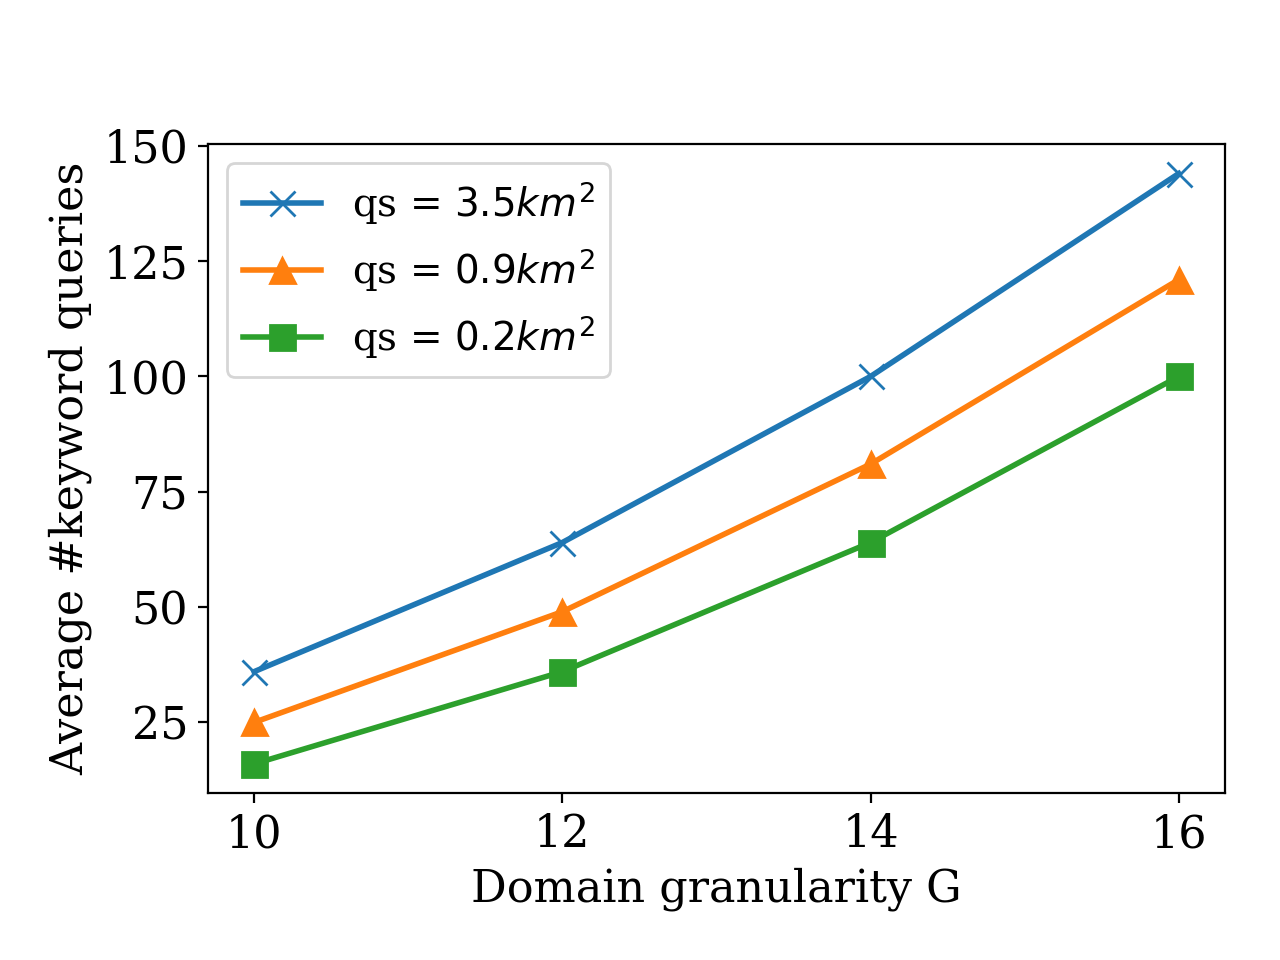

In [9]:
df_gowalla_LA_hxt_converted_from_hve_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted, delimiter='\t', index_col=False)

index_limit_level = 0
bf_false_positive_rate = 1E-05

# widths = [2**10, 2**13, 2**16]
widths_bits = [10, 12, 14, 16]
widths = [2**x for x in widths_bits]
# widths = [2**10, 2**12, 2**14, 2**16]
# linestyles = [ ':', '--', '-.']
linestyles = [ '-', '--', '-.']
n = 10000

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
query_sizes = ['$3.5km^2$', '$0.9km^2$', '$0.2km^2$']
query_levels = [5, 6, 7]
markers = ['x', '^', 's']
marker = markers[0]

for ql_i in range(len(query_levels)):
    query_level = query_levels[ql_i]
    query_size = query_sizes[ql_i]
    ls = linestyles[0]
    marker = markers[ql_i]
    
    data = df_gowalla_LA_hxt_converted_from_hve_brc_shifted
    data = data[data.query_level == query_level]
    data = data[data.n_checkins == n]
    data = data[data.index_limit_level == index_limit_level]
    data = data[data.bf_false_positive_rate == bf_false_positive_rate]
    data = data[data.width.isin(widths)]
    data = data.sort_values(by='width')
    label = 'qs = {0}'.format(query_size)
    plt.plot(widths_bits, data['avg_num_keywords_queries'].values, ls + marker, label=label, markersize=9, linewidth=2)
axes = plt.gca()
# axes.set_ylim([0, 16])
plt.xlabel('Domain granularity G')
plt.ylabel('Average #keyword queries')
# plt.xticks(widths, rotation=35)
plt.xticks(widths_bits)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
# plt.setp(axes.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.legend(loc=2)
# plt.title('HXT Average number of keyword queries per Spatial range query\nArbitrary query location')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_keywords_queries_arbitrary.eps')
plt.savefig('benchmark/charts/hxt_avg_keywords_queries_arbitrary.pdf')

## Number $|DB(w_1)|$

<IPython.core.display.Javascript object>


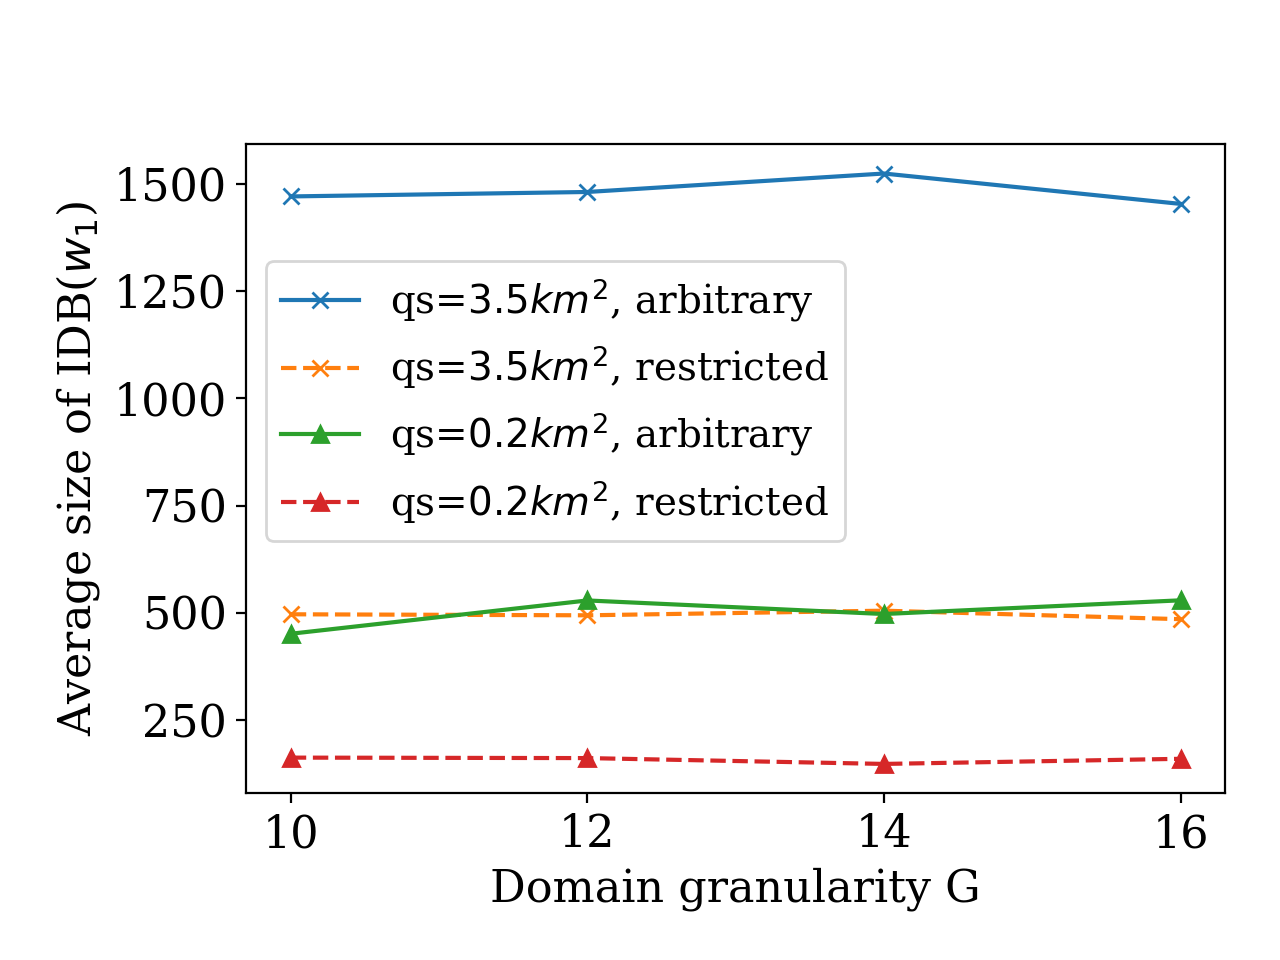

In [11]:
df_gowalla_LA_hxt_converted_from_hve_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted, delimiter='\t', index_col=False)
df_gowalla_LA_hxt_converted_from_hve_brc = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc, delimiter='\t', index_col=False)


index_limit_level = 0
bf_false_positive_rate = 1E-05

# widths = [2**10, 2**13, 2**16]
# widths = [2**10, 2**12, 2**14, 2**16]
widths_bits = [10, 12, 14, 16]
widths = [2**x for x in widths_bits]

# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--', '-.']
n = 10000

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
# query_levels = [5, 6, 7]

# query_sizes = ['1600x2200', '400x550']
query_sizes = ['$3.5km^2$', '$0.2km^2$']
query_levels = [5, 7]
markers = ['x', '^', 's']


for ql_i in range(len(query_levels)):
    query_level = query_levels[ql_i]
    query_size = query_sizes[ql_i]
    marker = markers[ql_i]
    
    ls = linestyles[0]
    data = df_gowalla_LA_hxt_converted_from_hve_brc_shifted
    data = data[data.query_level == query_level]
    data = data[data.n_checkins == n]
    data = data[data.index_limit_level == index_limit_level]
    data = data[data.bf_false_positive_rate == bf_false_positive_rate]
    data = data[data.width.isin(widths)]
    data = data.sort_values(by='width')
    label = 'qs={0}, arbitrary'.format(query_size)
    plt.plot(widths_bits, data['avg_t_set_stag_size'].values, ls + marker, label=label)
    
    ls = linestyles[1]
    data1 = df_gowalla_LA_hxt_converted_from_hve_brc
    data1 = data1[data1.query_level == query_level]
    data1 = data1[data1.n_checkins == n]
    data1 = data1[data1.index_limit_level == index_limit_level]
    data1 = data1[data1.bf_false_positive_rate == bf_false_positive_rate]
    data1 = data1[data1.width.isin(widths)]
    data1 = data1.sort_values(by='width')
    label = 'qs={0}, restricted'.format(query_size)
    plt.plot(widths_bits, data1['avg_t_set_stag_size'].values, ls + marker, label=label)
    
axes = plt.gca()
# axes.set_ylim([0, 3000])
plt.xlabel('Domain granularity G')
plt.ylabel('Average size of IDB($w_1$)')
plt.xticks(widths_bits)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
# plt.setp(axes.get_xticklabels(), rotation=35, horizontalalignment='right')
# plt.legend(loc='best')
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(0, 0.85))
# plt.title('HXT Average number of objects containing the first keyword\nper Spatial range query\n(Arbitrary query location)')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_t_set_stag_size_arbitrary.eps')
plt.savefig('benchmark/charts/hxt_avg_t_set_stag_size_arbitrary.pdf')

# HVE

## Average Query Time HVE Token-Item Pair (Query at nodes of the trees)


0    0.026400
1    0.052572
2    0.153949
3    0.349222
Name: avg_time_matching_per_token_cipher_pair, dtype: float64
12 0 0    0.343200
1    0.683436
2    2.001337
3    4.539886
Name: avg_time_matching_per_token_cipher_pair, dtype: float64


<IPython.core.display.Javascript object>


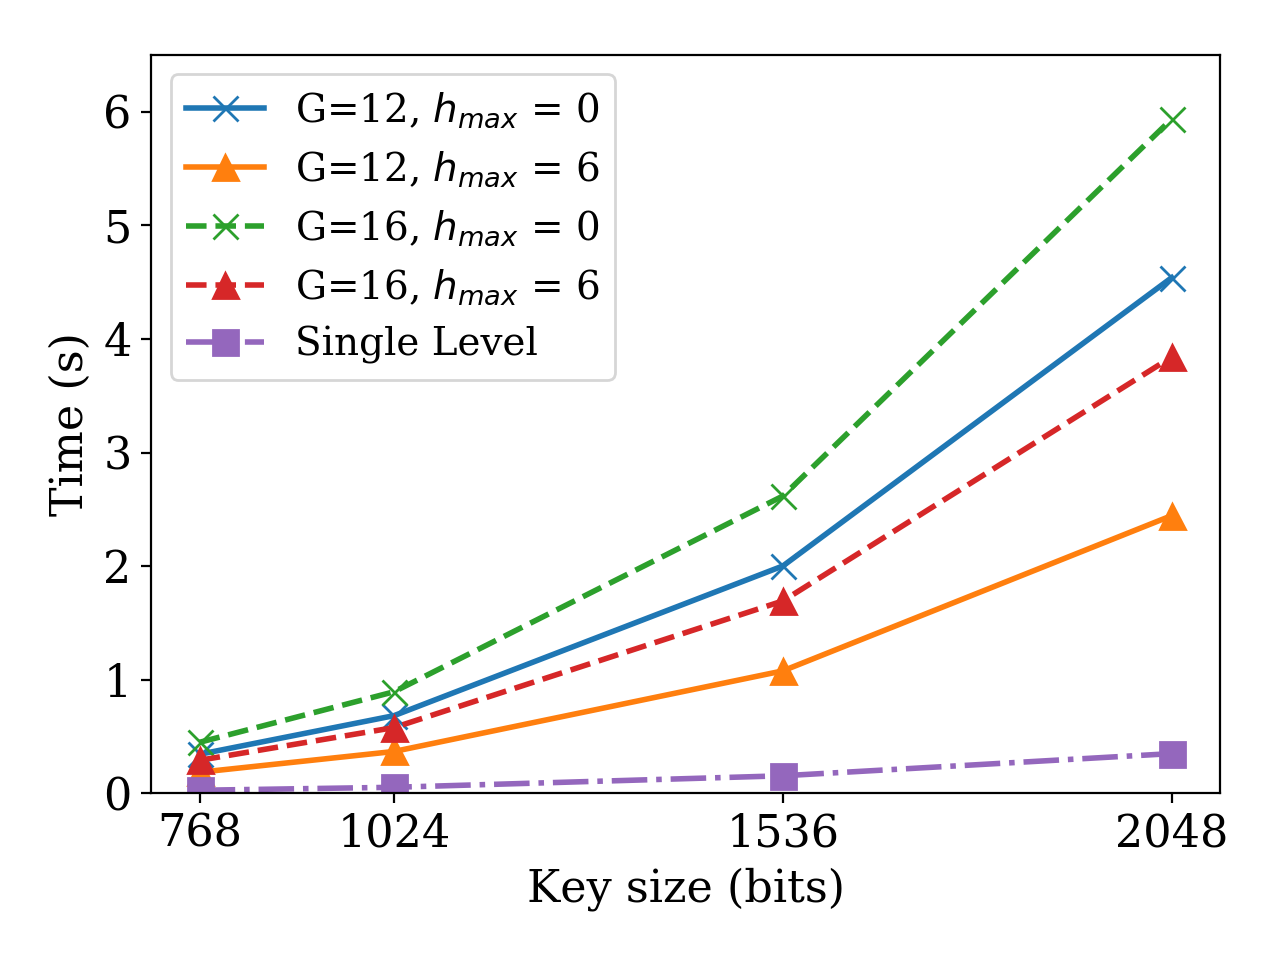

12 6 0    0.184800
1    0.368004
2    1.077643
3    2.444554
Name: avg_time_matching_per_token_cipher_pair, dtype: float64
16 0 0    0.448800
1    0.893724
2    2.617133
3    5.936774
Name: avg_time_matching_per_token_cipher_pair, dtype: float64
16 6 0    0.290400
1    0.578292
2    1.693439
3    3.841442
Name: avg_time_matching_per_token_cipher_pair, dtype: float64


In [24]:
bm_hve = pd.read_csv(benchmark_gowalla_LA_hve, delimiter='\t', index_col=False)
single_level_pairing_time = bm_hve['avg_time_matching_per_token_cipher_pair']
print(single_level_pairing_time)

key_sizes = [768, 1024, 1536, 2048]

# index_limit_levels = [0, 5, 6, 7]
index_limit_levels = [0, 6]
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
# widths = [2**10]
# width_bit_lens = [10, 12, 14, 16]
# linestyles = [ ':', '--', '-', '-.']
width_bit_lens = [12, 16]
linestyles = [ '-', '--']
    
for w_i in range(len(width_bit_lens)):
    width_bit_len  = width_bit_lens[w_i]
    width = 2 ** width_bit_len
    ls = linestyles[w_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        data = single_level_pairing_time * (width_bit_len - index_limit_level + 1)
        print(width_bit_len, index_limit_level, data)
            
        label = 'G={0}, $h_{{max}}$ = {1}'.format(width_bit_len, index_limit_level)
        plt.plot(key_sizes, data, ls + marker, label=label, markersize=9, linewidth=2)
#     break

# data = bm_hve['avg_time_matching_per_token_item_pair'] / 11 # this is time to match 11 cipher per item

label = 'Single Level'
plt.plot(key_sizes, single_level_pairing_time, '-.s', label=label, markersize=9, linewidth=2)
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 6.5])
plt.xticks(key_sizes)
plt.xlabel('Key size (bits)')
plt.ylabel('Time (s)')
plt.legend(loc=2, ncol=1)
# plt.title('HVE average query time per token-item pair')
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hve_avg_query_time_nodes.eps')
plt.savefig('benchmark/charts/hve_avg_query_time_nodes.pdf')

## Average Query Time HVE Token-Item Pair (Query at nodes of the trees) - Granularity


0    0.026400
1    0.052572
2    0.153949
3    0.349222
Name: avg_time_matching_per_token_cipher_pair, dtype: float64


<IPython.core.display.Javascript object>


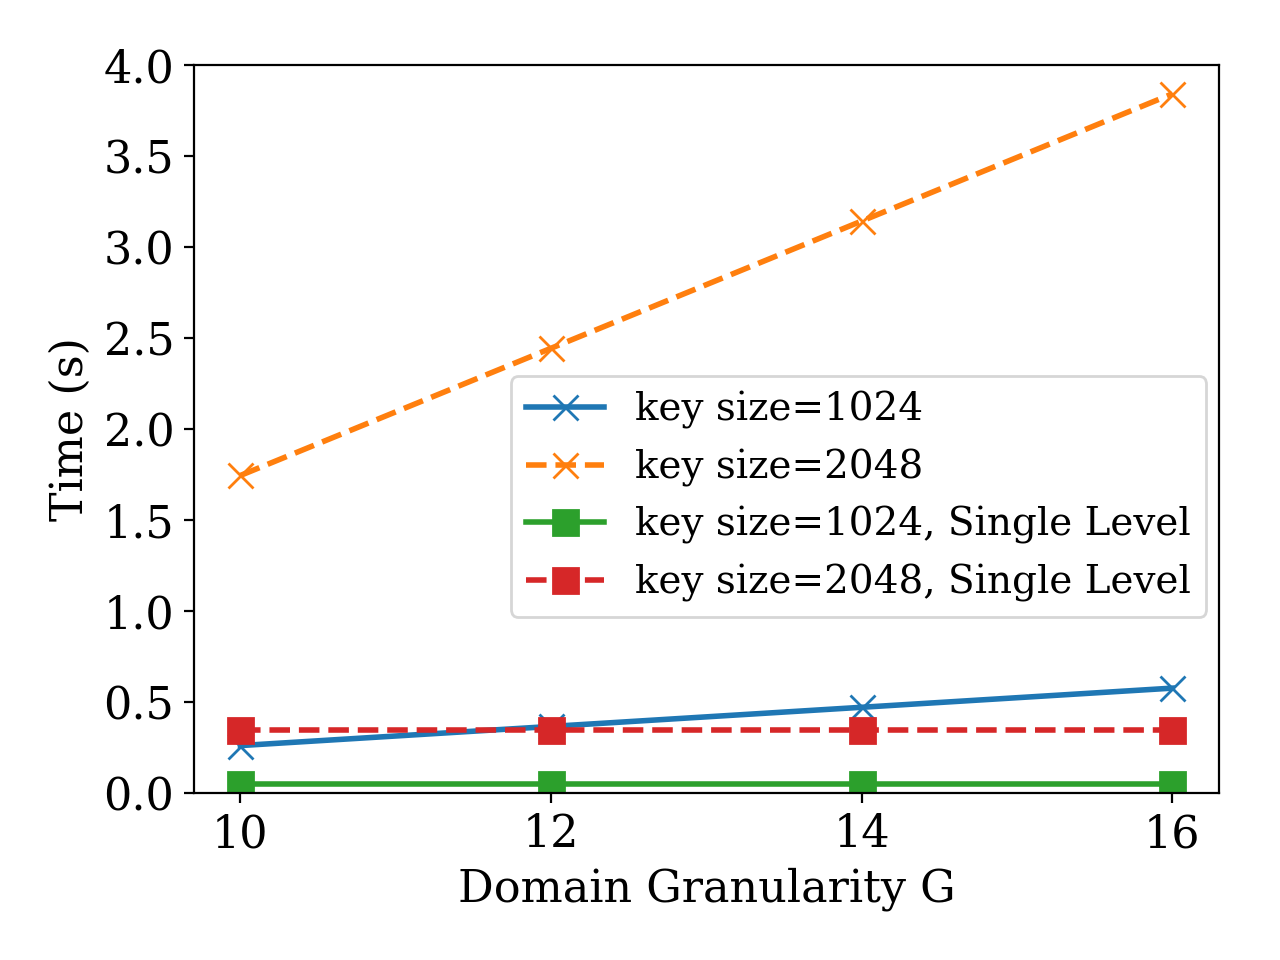

In [26]:
bm_hve = pd.read_csv(benchmark_gowalla_LA_hve, delimiter='\t', index_col=False)
single_level_pairing_time = bm_hve['avg_time_matching_per_token_cipher_pair']
print(single_level_pairing_time)

key_sizes = [768, 1024, 1536, 2048]
key_size_indices = [1, 3]
# key_sizes = [1024, 2048]

# index_limit_levels = [0, 5, 6, 7]
index_limit_levels = [6]
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
# widths = [2**10]
width_bit_lens = [10, 12, 14, 16]
linestyles = [ '-.', '-', ':', '--']
# width_bit_lens = [12, 16]
# linestyles = [ '-', '--']
    
for k_i in key_size_indices:
    key_size = key_sizes[k_i]
#     width_bit_len  = width_bit_lens[w_i]
    ls = linestyles[k_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        data = []
        for w_i in range(len(width_bit_lens)):
            width_bit_len  = width_bit_lens[w_i]
        
            data.append(single_level_pairing_time[k_i] * (width_bit_len - index_limit_level + 1))
            
        label = 'key size={0}'.format(key_size, index_limit_level)
        plt.plot(width_bit_lens, data, ls + marker, label=label, markersize=9, linewidth=2)
#     break

for k_i in key_size_indices:
    key_size = key_sizes[k_i]
    ls = linestyles[k_i]

#     data_w = bm_hve['avg_time_matching_per_token_item_pair'] / 11 # this is time to match 11 cipher per item
    data = []
    for i in range(len(width_bit_lens)):
        data.append(single_level_pairing_time[k_i])

    label = 'key size={0}, Single Level'.format(key_size)
    plt.plot(width_bit_lens, data, ls + 's', label=label, markersize=9, linewidth=2)

# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 4])
plt.xticks(width_bit_lens)
plt.xlabel('Domain Granularity G')
plt.ylabel('Time (s)')
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(0.29, 0.6))
# plt.title('HVE average query time per token-item pair')
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hve_avg_query_time_nodes_granularity.eps')
plt.savefig('benchmark/charts/hve_avg_query_time_nodes_granularity.pdf')

## HVE Cipher Size (Query at nodes of the trees)

<IPython.core.display.Javascript object>


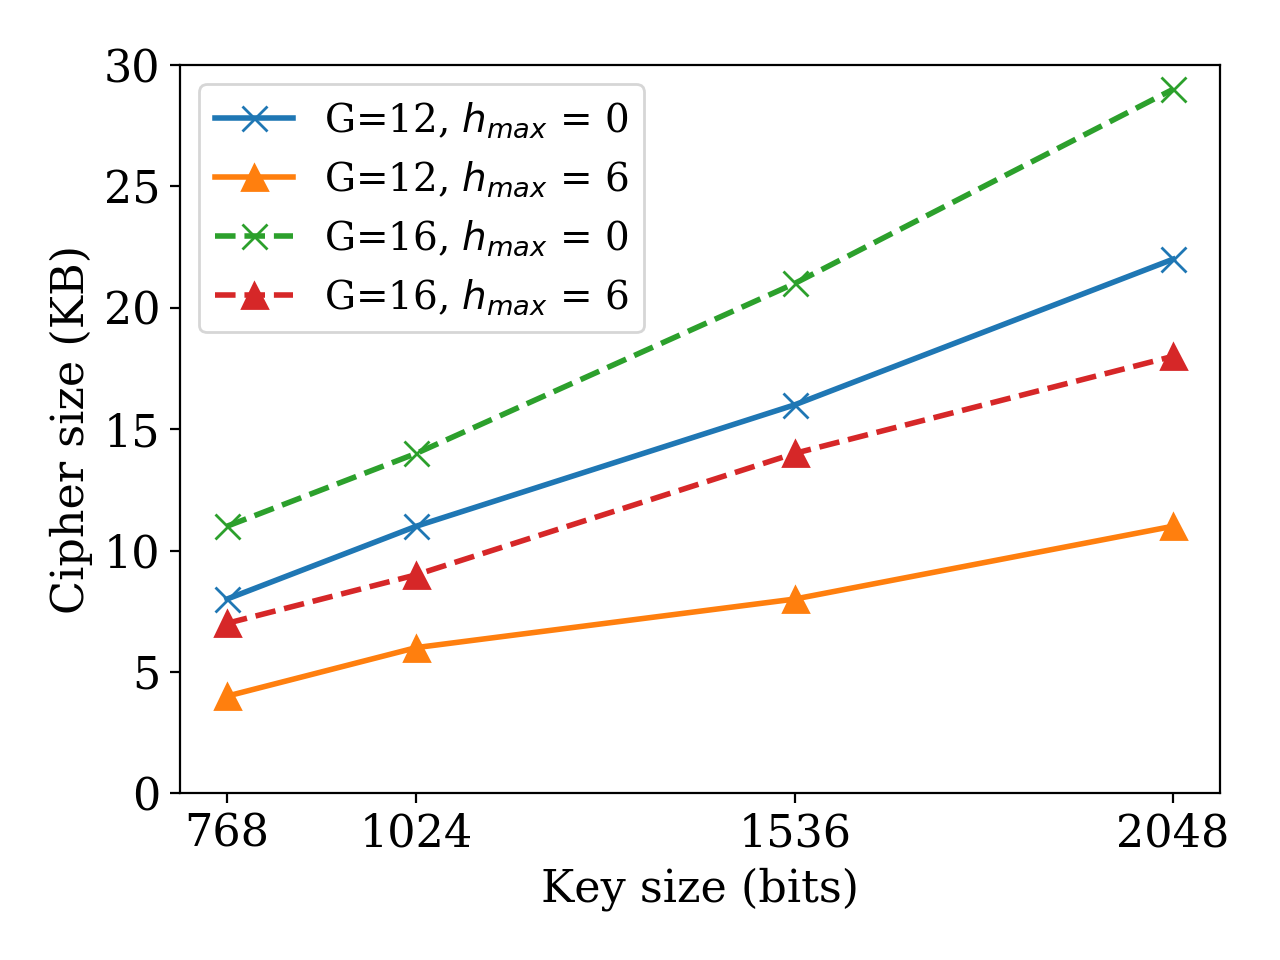

In [21]:
# key_sizes = [768, 1024, 1536, 2048, 4096]
key_sizes = [768, 1024, 1536, 2048]
serialized_group_element_sizes = [134, 178, 262, 350, 690]  # these numbers are found by running 'hve-exp' notebook

# Anologously. 
# Not exactly number of group element but the number of times a group element is count. 
# Size of C_prime is twice as much as size of other C_i, so it is counted twice. Other C_i is counted once
# See hve-exp notebook and paper for more details.
hve_width = 1
n_group_element_cipher = 2 + 1 + 2 * hve_width

n_group_element_token = 1 + 2 * hve_width

# index_limit_levels = [0, 5, 6, 7]
index_limit_levels = [0, 6]
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
# widths = [2**10]
# width_bit_lens = [10, 12, 14, 16]
# linestyles = [ ':', '--', '-', '-.']
width_bit_lens = [12, 16]
linestyles = [ '-', '--']
    
for w_i in range(len(width_bit_lens)):
    width_bit_len  = width_bit_lens[w_i]
    width = 2 ** width_bit_len
    ls = linestyles[w_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        data = list()
        for i in range(len(key_sizes)):
            serialized_group_element_size = serialized_group_element_sizes[i]
            cipher_size = serialized_group_element_size * n_group_element_cipher
            item_cipher_size = cipher_size * (width_bit_len - index_limit_level + 1)
            item_cipher_size //= 1024  # to KB
            
            data.append(item_cipher_size)
            
        label = 'G={0}, $h_{{max}}$ = {1}'.format(width_bit_len, index_limit_level)
        plt.plot(key_sizes, data, ls + marker, label=label, markersize=9, linewidth=2)
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 30])
plt.xticks(key_sizes)
plt.xlabel('Key size (bits)')
plt.ylabel('Cipher size (KB)')
plt.legend(loc=2, ncol=1)
plt.tight_layout()
# plt.title('HVE cipher size per item')
plt.show()
plt.savefig('benchmark/charts/hve_cipher_size_per_item.eps')
plt.savefig('benchmark/charts/hve_cipher_size_per_item.pdf')

## HVE Token Size (Query at nodes of the trees)

[402, 534, 786, 1050]


<IPython.core.display.Javascript object>


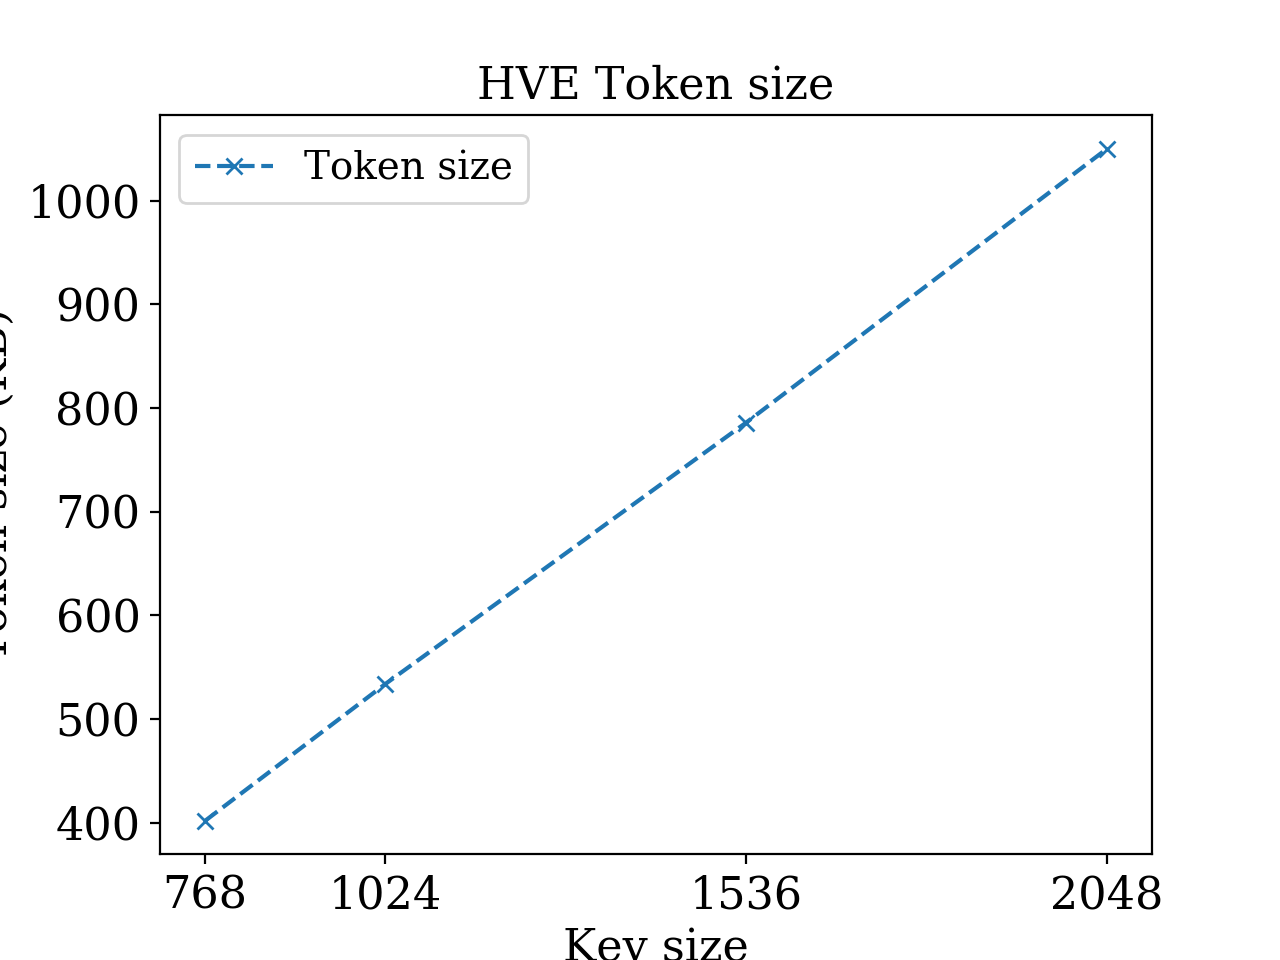

In [22]:
key_sizes = [768, 1024, 1536, 2048]
serialized_group_element_sizes = [134, 178, 262, 350, 690]

# Anologously. 
# Not exactly number of group element but the number of times a group element is count. 
# Size of C_prime is twice as much as size of other C_i, so it is counted twice. Other C_i is counted once
# See hve-exp notebook and paper for more details.
hve_width = 1
n_group_element_cipher = 2 + 1 + 2 * hve_width

n_group_element_token = 1 + 2 * hve_width

# index_limit_levels = [0, 5, 6, 7]
# markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
# widths = [2**10]

        
data = list()
for i in range(len(key_sizes)):
    serialized_group_element_size = serialized_group_element_sizes[i]
    token_size = serialized_group_element_size * n_group_element_token
#     token_size /= 1024  # to KB

    data.append(token_size)
    
print(data)

# label = 'L = {0}, $h_{{max}}$ = {1}'.format(width, index_limit_level)
# plt.plot(key_sizes, data, ls + marker, label=label)
label = 'Token size'
plt.plot(key_sizes, data, '--x', label=label)

# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
# axes.set_ylim([0, 4])
plt.xticks(key_sizes)
plt.xlabel('Key size')
plt.ylabel('Token size (KB)')
plt.legend(loc=2)
plt.title('HVE Token size')
plt.show()
plt.savefig('benchmark/charts/hve_token_size.pdf')

## HVE Cipher Gen Time Per Item

<IPython.core.display.Javascript object>


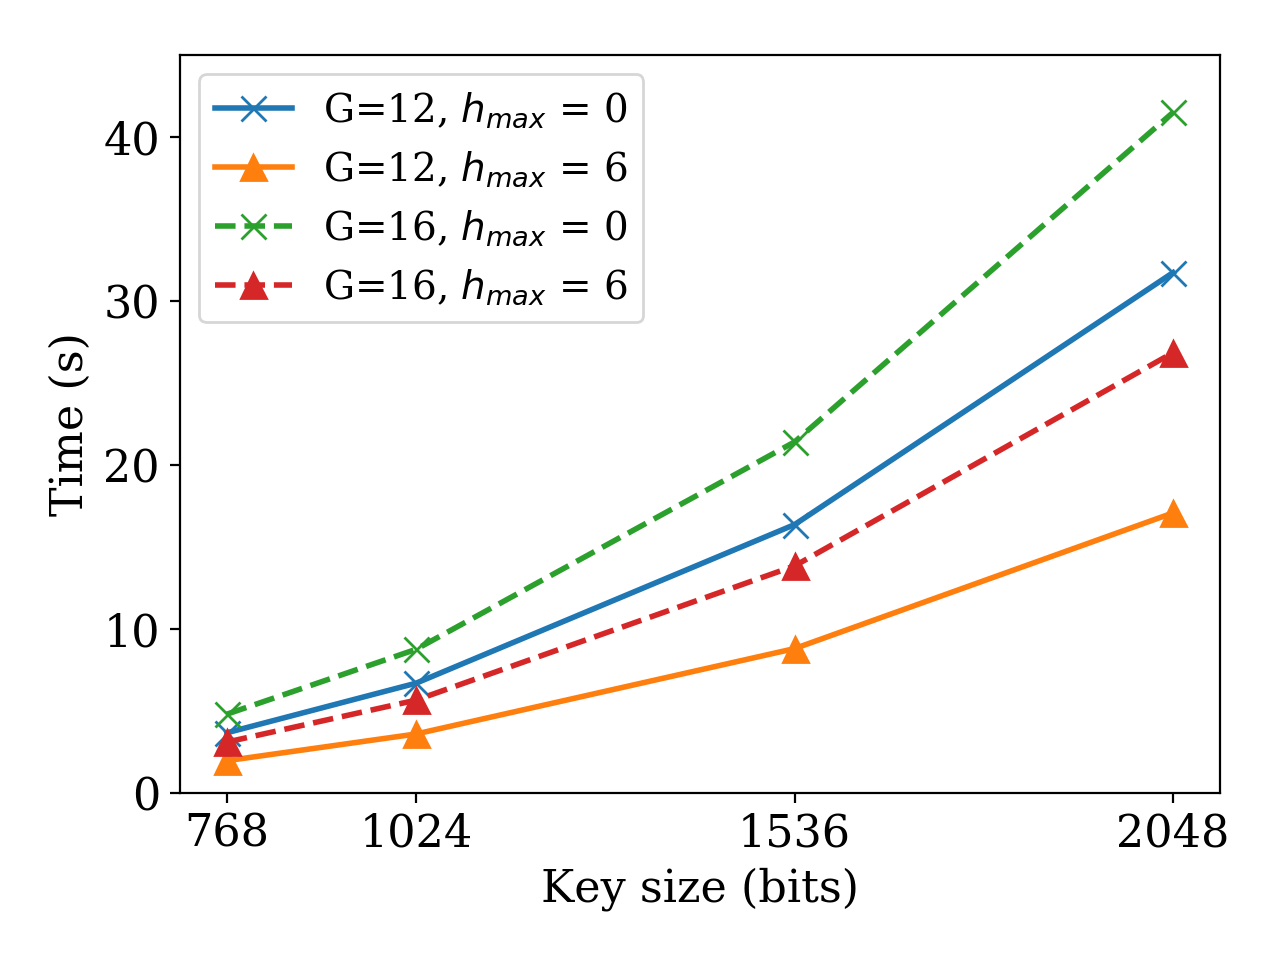

In [17]:
bm_hve = pd.read_csv(benchmark_gowalla_LA_hve, delimiter='\t', index_col=False)

key_sizes = [768, 1024, 1536, 2048]

# index_limit_levels = [0, 5, 6, 7]
# markers = ['x', '^', 's', 'o']

# width_bit_lens = [10, 12, 14, 16]
# linestyles = [ ':', '--', '-', '-.']

index_limit_levels = [0, 6]
markers = ['x', '^', 's', 'o']

width_bit_lens = [12, 16]
linestyles = [ '-', '--']
    
for w_i in range(len(width_bit_lens)):
    width_bit_len  = width_bit_lens[w_i]
    width = 2 ** width_bit_len
    ls = linestyles[w_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        # data = bm_hve['avg_time_gen_cipher'] / 4 # BE CAREFUL WITH THIS NUMBER. MAKE SURE THAT IT IS CORRECT. (NOW I HAVE NO IDEA WHAT THIS NUMBER MEANS)
        data = bm_hve['avg_time_gen_cipher'] # this is time to genenate SINGLE LEVEL cipher
        data = data * (width_bit_len - index_limit_level + 1)
            
        label = 'G={0}, $h_{{max}}$ = {1}'.format(width_bit_len, index_limit_level)
        plt.plot(key_sizes, data, ls + marker, label=label, markersize=9, linewidth=2)
#     break
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 45])
plt.xticks(key_sizes)
plt.xlabel('Key size (bits)')
plt.ylabel('Time (s)')
plt.legend(loc=2, ncol=1)
plt.tight_layout()
# plt.title('Time to generate HVE cipher per item')
plt.show()
plt.savefig('benchmark/charts/hve_cipher_time_per_item.eps')
plt.savefig('benchmark/charts/hve_cipher_time_per_item.pdf')

## HVE Token Gen Time Per Item

0    0.019559
1    0.036122
2    0.085868
3    0.165143
Name: avg_time_gen_tokens, dtype: float64


<IPython.core.display.Javascript object>


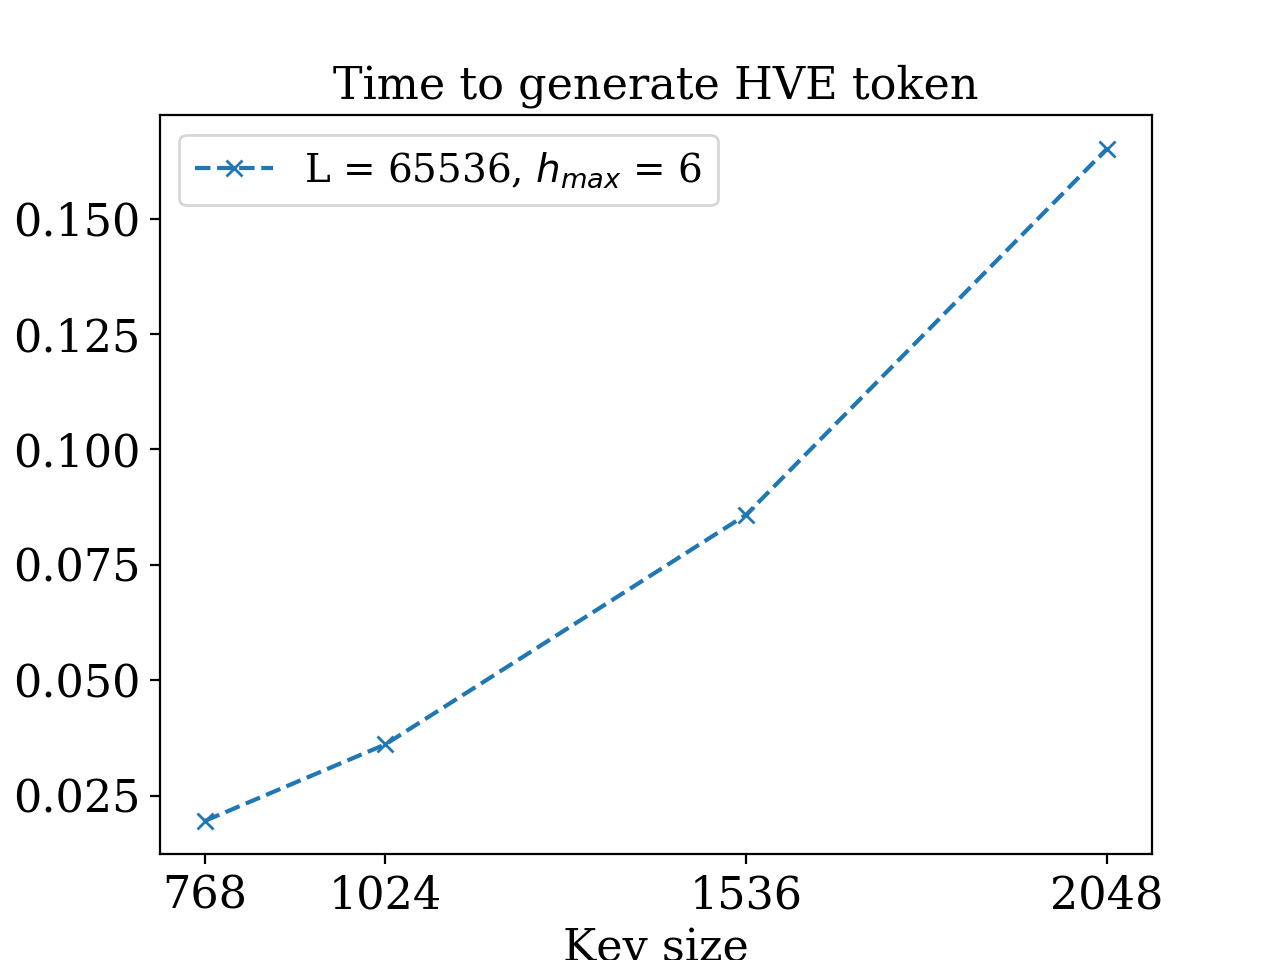

In [8]:
bm_hve = pd.read_csv(benchmark_gowalla_LA_hve, delimiter='\t', index_col=False)

key_sizes = [768, 1024, 1536, 2048]
    
data = bm_hve['avg_time_gen_tokens']
print(data)

label = 'L = {0}, $h_{{max}}$ = {1}'.format(width, index_limit_level)
plt.plot(key_sizes, data, ls + marker, label=label)
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
# axes.set_ylim([0, 80])
plt.xticks(key_sizes)
plt.xlabel('Key size')
plt.ylabel('Time (s)')
plt.legend(loc=2)
plt.title('Time to generate HVE token')
plt.show()
plt.savefig('benchmark/charts/hve_token_time.pdf')

# Hierarchical

In [4]:
benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted.csv'
benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical.csv'
benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted.csv'
benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical = 'benchmark/benchmark_gowalla_LA_hxt/benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical.csv'

## Query arbitrary

                   time scheme  width  n_checkins  index_limit_level  \
59  2019-10-19T11:53:27    HXT   4096       10000                  0   
71  2019-10-19T12:48:27    HXT   4096       20000                  0   
83  2019-10-19T13:44:23    HXT   4096       50000                  0   
95  2019-10-19T14:42:00    HXT   4096      100000                  0   

    query_level      encoding  shifted  paralleled bf_false_positive_rate  \
59            5  HIERARCHICAL     True       False                  1E-05   
71            5  HIERARCHICAL     True       False                  1E-05   
83            5  HIERARCHICAL     True       False                  1E-05   
95            5  HIERARCHICAL     True       False                  1E-05   

    avg_time  avg_num_matches  avg_t_set_stag_size  avg_num_keywords_queries  \
59     4.742            68.92                68.92                     742.0   
71     4.755           137.24               137.24                     742.0   
83     4.771 

<IPython.core.display.Javascript object>


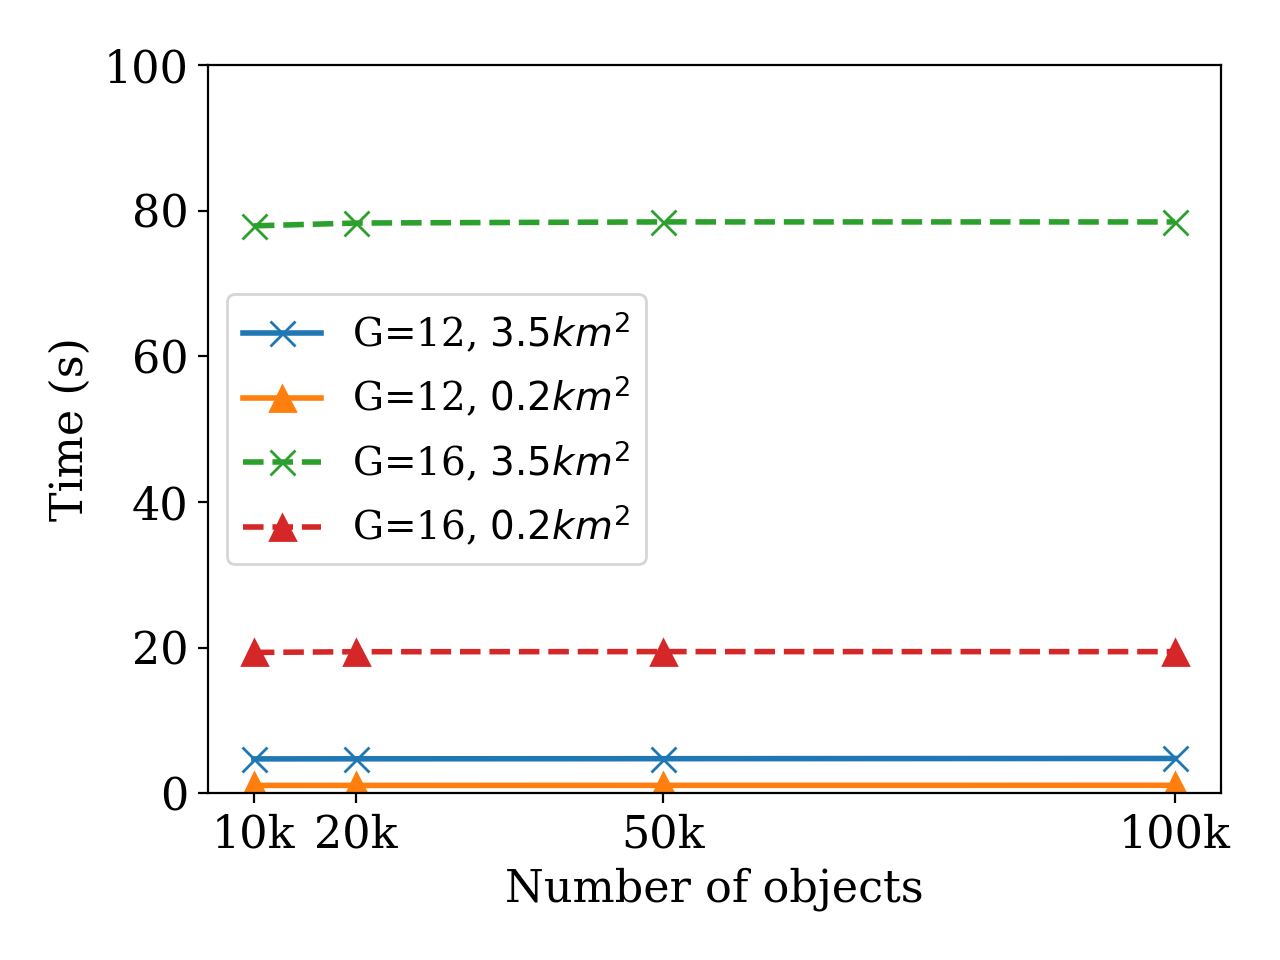

                   time scheme  width  n_checkins  index_limit_level  \
57  2019-10-19T11:41:38    HXT   4096       10000                  0   
69  2019-10-19T12:36:34    HXT   4096       20000                  0   
81  2019-10-19T13:32:17    HXT   4096       50000                  0   
93  2019-10-19T14:29:31    HXT   4096      100000                  0   

    query_level      encoding  shifted  paralleled bf_false_positive_rate  \
57            7  HIERARCHICAL     True       False                  1E-05   
69            7  HIERARCHICAL     True       False                  1E-05   
81            7  HIERARCHICAL     True       False                  1E-05   
93            7  HIERARCHICAL     True       False                  1E-05   

    avg_time  avg_num_matches  avg_t_set_stag_size  avg_num_keywords_queries  \
57     1.102            22.29                22.29                     172.0   
69     1.104            43.77                43.77                     172.0   
81     1.114 

In [7]:
df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted, delimiter='\t', index_col=False)

index_limit_level = 0
num_checkins = [10000, 20000, 50000, 100000]
num_checkins_label = ['10k', '20k', '50k', '100k']


widths = [2**12, 2**16]
linestyles = [ '-', '--']
# widths = [2**10, 2**12, 2**14, 2**16]
# linestyles = [ ':', '--', '-', '-.']

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
# query_levels = [5, 6, 7]
query_sizes = ['$3.5km^2$', '$0.2km^2$']
query_levels = [5, 7]
markers = ['x', '^', 's']
    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    for ql_i in range(len(query_levels)):
        query_level = query_levels[ql_i]
        query_size = query_sizes[ql_i]
        marker = markers[ql_i]
        
        data = df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted
        data = data[data.width == width]
        data = data[data.query_level == query_level]
        data = data[data.index_limit_level == index_limit_level]
        print(data)
        label = 'G={0}, {1}'.format(width.bit_length() - 1, query_size)
        plt.plot(num_checkins, data['avg_time'], ls + marker, label=label, markersize=9, linewidth=2)
axes = plt.gca()
axes.set_ylim([0, 100])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.xticks(num_checkins, num_checkins_label)
plt.legend(loc='center left', ncol=1)
plt.tight_layout()
# plt.title('HXT Average query time\nArbitrary query location')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_query_time_arbitrary_hierarchical.eps')
plt.savefig('benchmark/charts/hxt_avg_query_time_arbitrary_hierarchical.pdf')

## Query at nodes

                   time  width  n_checkins  index_limit_level  query_level  \
59  2019-10-19T07:50:36   4096       10000                  0            5   
71  2019-10-19T07:51:34   4096       20000                  0            5   
83  2019-10-19T07:53:29   4096       50000                  0            5   
95  2019-10-19T07:57:04   4096      100000                  0            5   

        encoding  shifted  avg_time  avg_num_matches  avg_t_set_stag_size  \
59  HIERARCHICAL    False     0.013            68.92                68.92   
71  HIERARCHICAL    False     0.020           137.24               137.24   
83  HIERARCHICAL    False     0.040           341.19               341.19   
95  HIERARCHICAL    False     0.074           689.83               689.83   

    avg_num_keywords_queries  avg_false_positive_rate  
59                       1.0                      0.0  
71                       1.0                      0.0  
83                       1.0                      0.0  

<IPython.core.display.Javascript object>


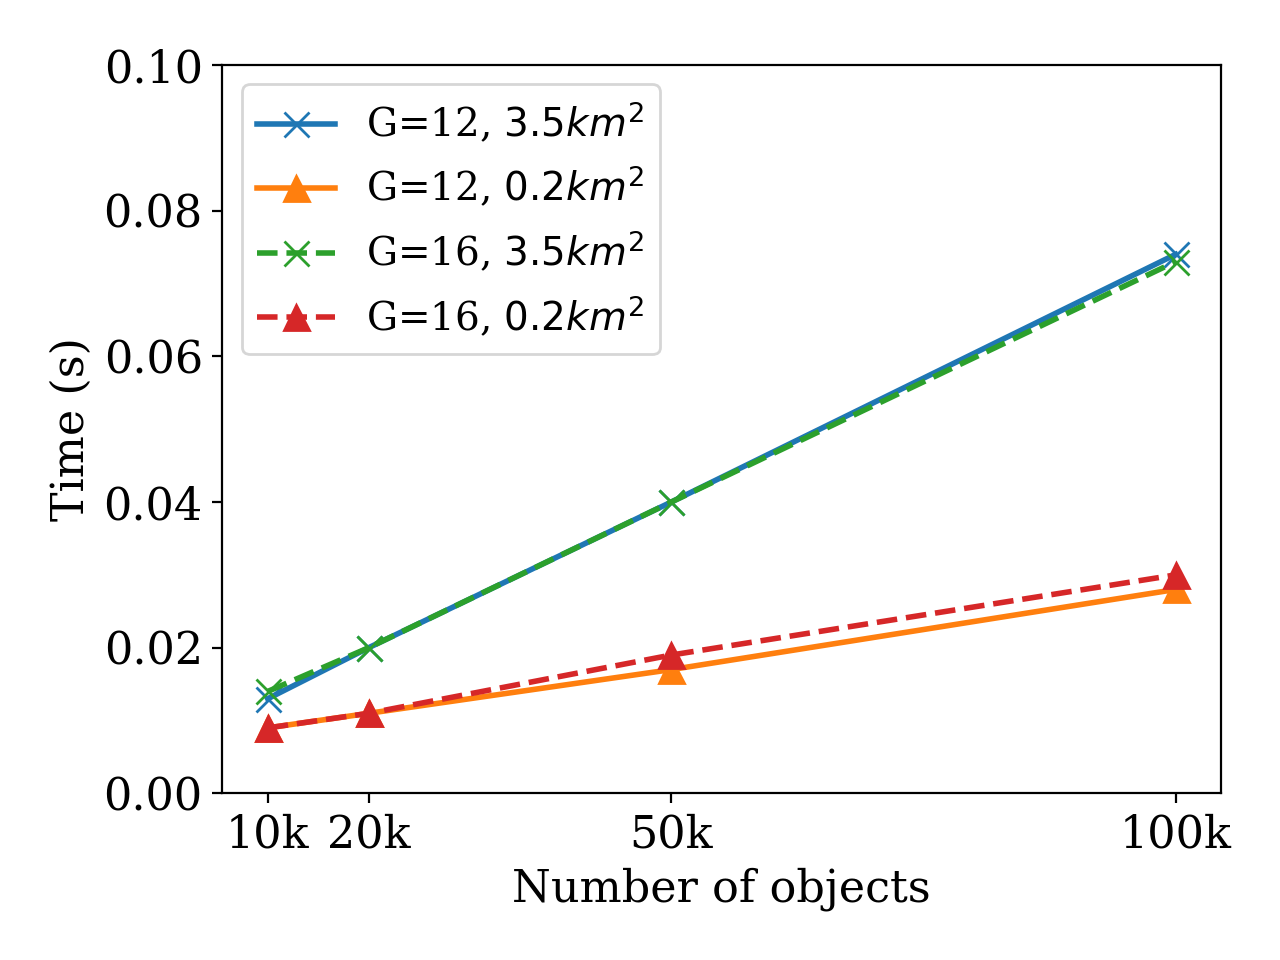

                   time  width  n_checkins  index_limit_level  query_level  \
57  2019-10-19T07:50:31   4096       10000                  0            7   
69  2019-10-19T07:51:25   4096       20000                  0            7   
81  2019-10-19T07:53:07   4096       50000                  0            7   
93  2019-10-19T07:56:19   4096      100000                  0            7   

        encoding  shifted  avg_time  avg_num_matches  avg_t_set_stag_size  \
57  HIERARCHICAL    False     0.009            22.29                22.29   
69  HIERARCHICAL    False     0.011            43.77                43.77   
81  HIERARCHICAL    False     0.017           106.66               106.66   
93  HIERARCHICAL    False     0.028           212.89               212.89   

    avg_num_keywords_queries  avg_false_positive_rate  
57                       1.0                      0.0  
69                       1.0                      0.0  
81                       1.0                      0.0  

In [8]:
df_gowalla_LA_hxt_converted_from_hve_hierarchical = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical, delimiter='\t', index_col=False)

index_limit_level = 0
num_checkins = [10000, 20000, 50000, 100000]

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
widths = [2**12, 2**16]
linestyles = [ '-', '--']
# linestyles = [ ':', '--', '-', '-.']

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
# query_levels = [5, 6, 7]
query_sizes = ['$3.5km^2$', '$0.2km^2$']
query_levels = [5, 7]
markers = ['x', '^', 's']
    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    
    for ql_i in range(len(query_levels)):
        query_level = query_levels[ql_i]
        query_size = query_sizes[ql_i]
        marker = markers[ql_i]
        
        data = df_gowalla_LA_hxt_converted_from_hve_hierarchical
        data = data[data.width == width]
        data = data[data.query_level == query_level]
        data = data[data.index_limit_level == index_limit_level]
        print(data)
        label = 'G={0}, {1}'.format(width.bit_length()-1, query_size)
        plt.plot(num_checkins, data['avg_time'], ls + marker, label=label, markersize=9, linewidth=2)
# hve
#plt.plot(num_checkins,  [n * hve_avg_time for n in num_checkins], '-.*', label='HVE')
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 0.1])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.xticks(num_checkins, num_checkins_label)
plt.legend(loc=2, ncol=1)
plt.tight_layout()
# plt.title('HXT Average query time\nQuery at nodes of the trees')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_query_time_nodes_hierarchical.eps')
plt.savefig('benchmark/charts/hxt_avg_query_time_nodes_hierarchical.pdf')

## Index build time

<IPython.core.display.Javascript object>


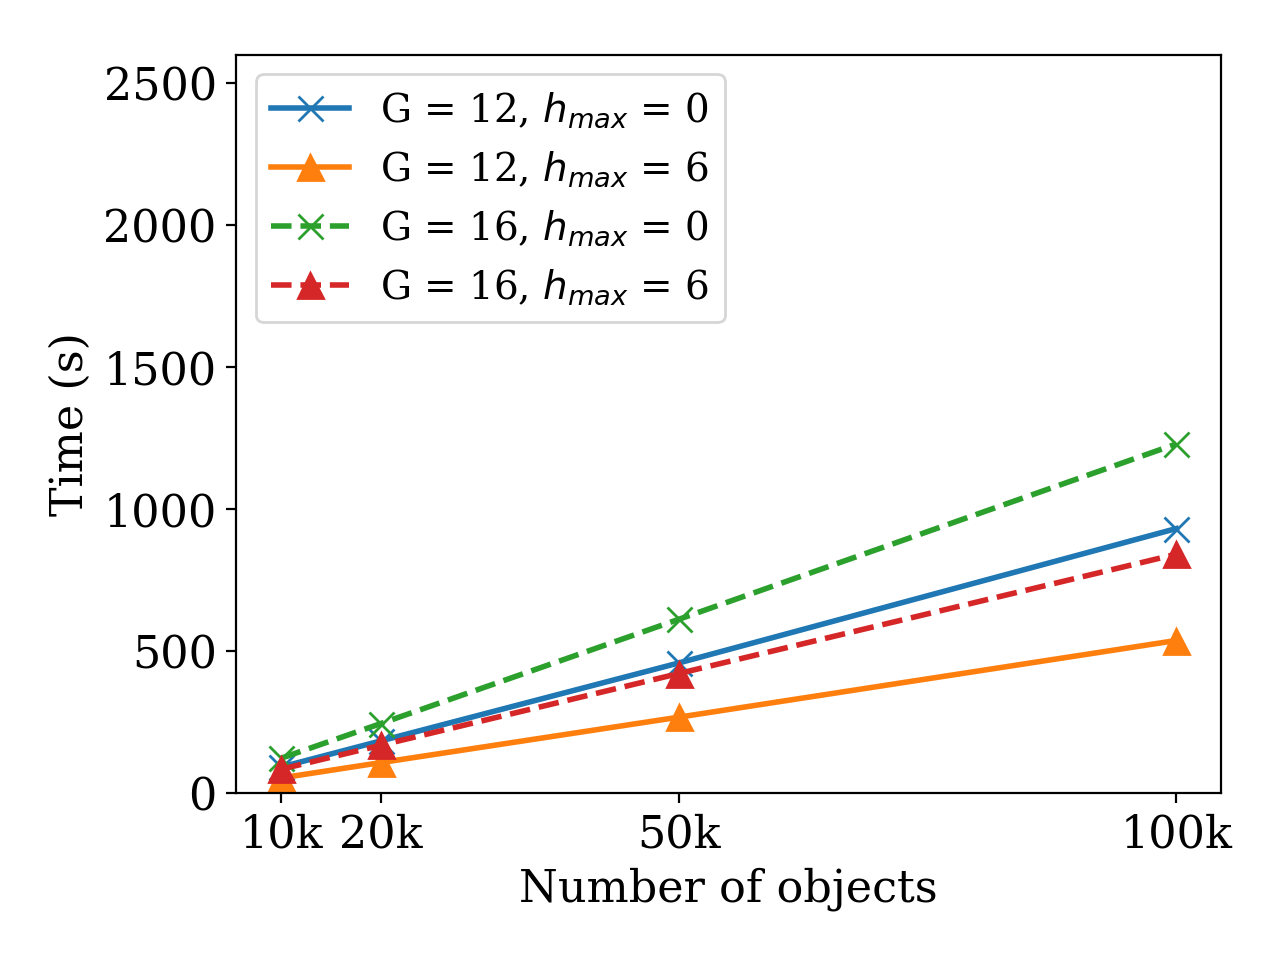

In [16]:
df_gowalla_LA_hxt_gen_index_seq_hierarchical = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical, delimiter='\t', index_col=False)

num_checkins = [10000, 20000, 50000, 100000]
num_checkins_label = ['10k', '20k', '50k', '100k']

# index_limit_levels = [0, 5, 6, 7]
index_limit_levels = [0, 6]
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
widths = [2**12, 2**16]
# widths = [2**10]
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']

    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        data = df_gowalla_LA_hxt_gen_index_seq_hierarchical
        data = data[data.width == width]
        data = data[data.index_limit_level == index_limit_level]
        label = 'G = {0}, $h_{{max}}$ = {1}'.format(width.bit_length()-1, index_limit_level)
        plt.plot(num_checkins, data['total_time'], ls + marker, label=label, markersize=9, linewidth=2)
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 2600])
plt.xlabel('Number of objects')
plt.ylabel('Time (s)')
plt.xticks(num_checkins, num_checkins_label)
plt.legend(loc=2, ncol=1)
plt.tight_layout()
# plt.title('HXT Index Build time')
plt.show()
plt.savefig('benchmark/charts/hxt_index_build_time_hierarchical.eps')
plt.savefig('benchmark/charts/hxt_index_build_time_hierarchical.pdf')

## Index size

<IPython.core.display.Javascript object>


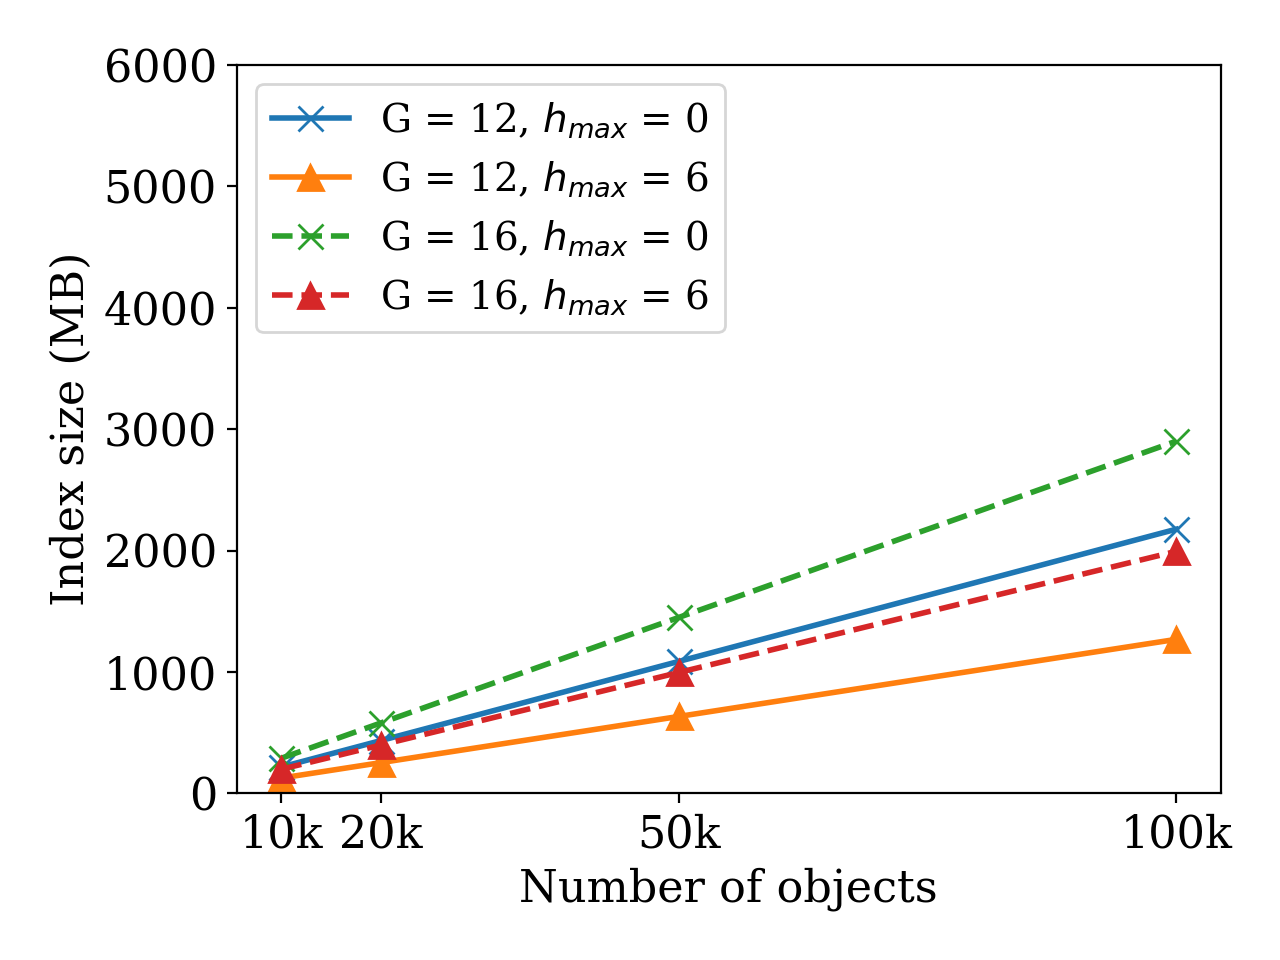

In [19]:
df_gowalla_LA_hxt_gen_index_seq_hierarchical = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical, delimiter='\t', index_col=False)

bytes_per_mb = 2 ** 20

num_checkins = [10000, 20000, 50000, 100000]
num_checkins_label = ['10k', '20k', '50k', '100k']

# index_limit_levels = [0, 5, 6, 7]
index_limit_levels = [0, 6]
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
widths = [2**12, 2**16]
# widths = [2**10]
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']
    
for w_i in range(len(widths)):
    width = widths[w_i]
    ls = linestyles[w_i]
    
    for ill_i in range(len(index_limit_levels)):
        index_limit_level = index_limit_levels[ill_i]
        marker = markers[ill_i]
        
        data = df_gowalla_LA_hxt_gen_index_seq_hierarchical
        data = data[data.width == width]
        data = data[data.index_limit_level == index_limit_level]
        data = data['total_size'] / bytes_per_mb
        label = 'G = {0}, $h_{{max}}$ = {1}'.format(width.bit_length()-1, index_limit_level)
        plt.plot(num_checkins, data, ls + marker, label=label, markersize=9, linewidth=2)
# hve
axes = plt.gca()
#axes.set_ylim([0, 4.5])
axes.set_ylim([0, 6000])
plt.xlabel('Number of objects')
plt.ylabel('Index size (MB)')
plt.legend(loc=2, ncol=1)
plt.xticks(num_checkins, num_checkins_label)
# plt.title('HXT Index Size')
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hxt_index_size_hierarchical.eps')
plt.savefig('benchmark/charts/hxt_index_size_hierarchical.pdf')

## Avg number of keyword queries

<IPython.core.display.Javascript object>


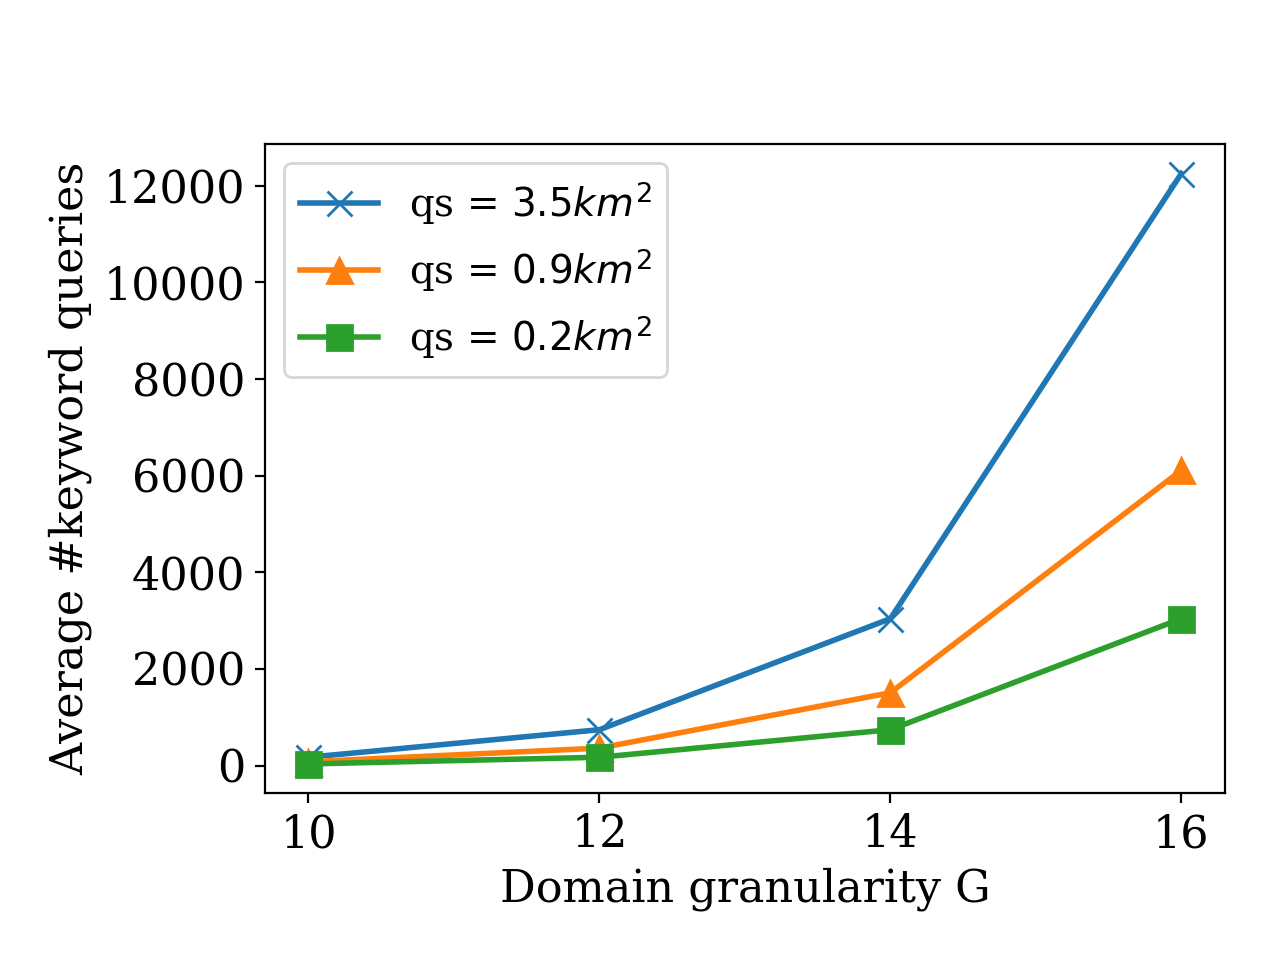

In [20]:
df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted, delimiter='\t', index_col=False)

index_limit_level = 0
bf_false_positive_rate = '1E-05'

# widths = [2**10, 2**13, 2**16]
widths_bits = [10, 12, 14, 16]
widths = [2**x for x in widths_bits]
# widths = [2**10, 2**12, 2**14, 2**16]
# linestyles = [ ':', '--', '-.']
linestyles = [ '-', '--', '-.']
n = 10000

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
query_sizes = ['$3.5km^2$', '$0.9km^2$', '$0.2km^2$']
query_levels = [5, 6, 7]
markers = ['x', '^', 's']
marker = markers[0]

for ql_i in range(len(query_levels)):
    query_level = query_levels[ql_i]
    query_size = query_sizes[ql_i]
    ls = linestyles[0]
    marker = markers[ql_i]
    
    data = df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted
    data = data[data.query_level == query_level]
    data = data[data.n_checkins == n]
    data = data[data.index_limit_level == index_limit_level]
    data = data[data.bf_false_positive_rate == bf_false_positive_rate]
    data = data[data.width.isin(widths)]
    data = data.sort_values(by='width')
    label = 'qs = {0}'.format(query_size)
    plt.plot(widths_bits, data['avg_num_keywords_queries'].values, ls + marker, label=label, markersize=9, linewidth=2)
axes = plt.gca()
# axes.set_ylim([0, 16])
plt.xlabel('Domain granularity G')
plt.ylabel('Average #keyword queries')
# plt.xticks(widths, rotation=35)
plt.xticks(widths_bits)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
# plt.setp(axes.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.legend(loc=2)
# plt.title('HXT Average number of keyword queries per Spatial range query\nArbitrary query location')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_keywords_queries_arbitrary_hierarchical.eps')
plt.savefig('benchmark/charts/hxt_avg_keywords_queries_arbitrary_hierarchical.pdf')

## Number $|DB(w_1)|$

<IPython.core.display.Javascript object>


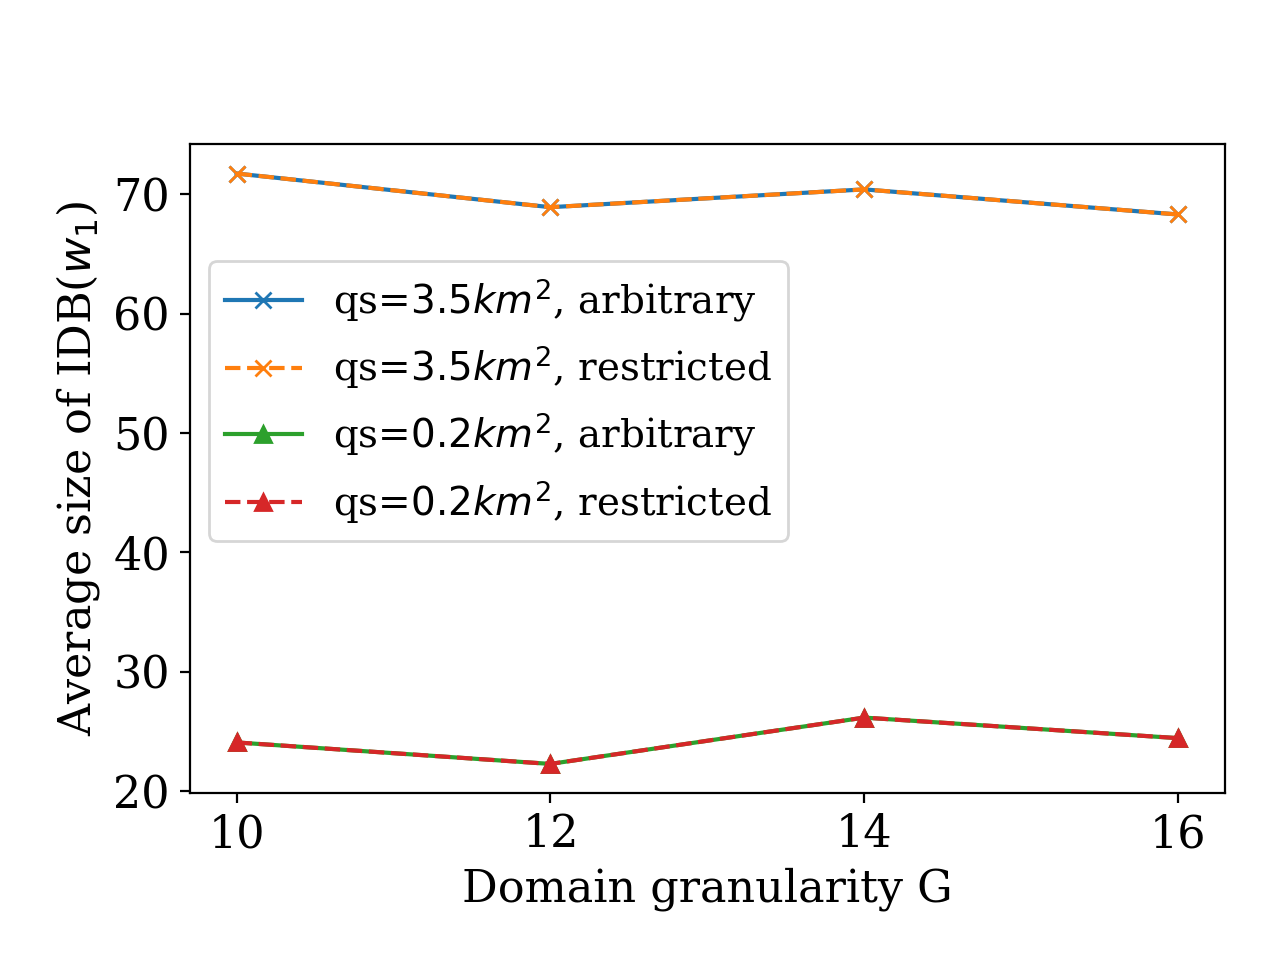

In [21]:
df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted, delimiter='\t', index_col=False)
df_gowalla_LA_hxt_converted_from_hve_hierarchical = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical, delimiter='\t', index_col=False)


index_limit_level = 0
bf_false_positive_rate = '1E-05'

# widths = [2**10, 2**13, 2**16]
# widths = [2**10, 2**12, 2**14, 2**16]
widths_bits = [10, 12, 14, 16]
widths = [2**x for x in widths_bits]

# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--', '-.']
n = 10000

# query_sizes = ['1600m x 1600m', '800m x 800m', '400m x 400m']
# query_sizes = ['1600x2200', '800x1100', '400x550']
# query_levels = [5, 6, 7]

# query_sizes = ['1600x2200', '400x550']
query_sizes = ['$3.5km^2$', '$0.2km^2$']
query_levels = [5, 7]
markers = ['x', '^', 's']


for ql_i in range(len(query_levels)):
    query_level = query_levels[ql_i]
    query_size = query_sizes[ql_i]
    marker = markers[ql_i]
    
    ls = linestyles[0]
    data = df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted
    data = data[data.query_level == query_level]
    data = data[data.n_checkins == n]
    data = data[data.index_limit_level == index_limit_level]
    data = data[data.bf_false_positive_rate == bf_false_positive_rate]
    data = data[data.width.isin(widths)]
    data = data.sort_values(by='width')
    label = 'qs={0}, arbitrary'.format(query_size)
    plt.plot(widths_bits, data['avg_t_set_stag_size'].values, ls + marker, label=label)
    
    ls = linestyles[1]
    data1 = df_gowalla_LA_hxt_converted_from_hve_hierarchical
    data1 = data1[data1.query_level == query_level]
    data1 = data1[data1.n_checkins == n]
    data1 = data1[data1.index_limit_level == index_limit_level]
    data1 = data1[data1.width.isin(widths)]
    data1 = data1.sort_values(by='width')
    label = 'qs={0}, restricted'.format(query_size)
    plt.plot(widths_bits, data1['avg_t_set_stag_size'].values, ls + marker, label=label)
    
axes = plt.gca()
# axes.set_ylim([0, 3000])
plt.xlabel('Domain granularity G')
plt.ylabel('Average size of IDB($w_1$)')
plt.xticks(widths_bits)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
# plt.setp(axes.get_xticklabels(), rotation=35, horizontalalignment='right')
# plt.legend(loc='best')
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(0, 0.85))
# plt.title('HXT Average number of objects containing the first keyword\nper Spatial range query\n(Arbitrary query location)')
plt.show()
plt.savefig('benchmark/charts/hxt_avg_t_set_stag_size_arbitrary_hierarchical.eps')
plt.savefig('benchmark/charts/hxt_avg_t_set_stag_size_arbitrary_hierarchical.pdf')

# Different False Positive Rates - index time

## Index size

<IPython.core.display.Javascript object>


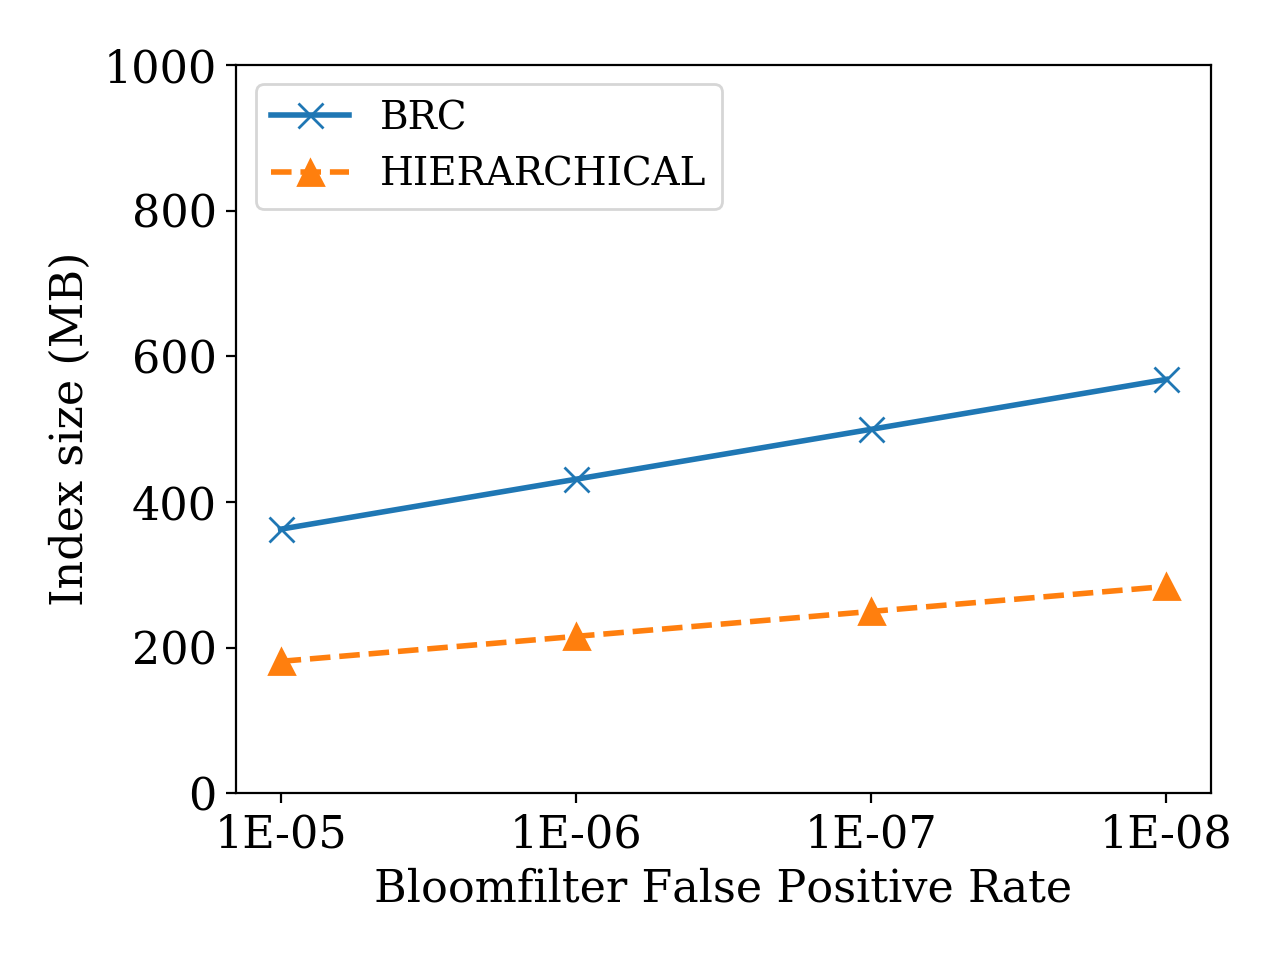

In [25]:
df_gowalla_LA_hxt_gen_index_seq_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted, delimiter='\t', index_col=False)
df_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted, delimiter='\t', index_col=False)
bytes_per_mb = 2 ** 20

bf_fprs = ['1E-05', '1E-06', '1E-07', '1E-08']

n_checkins = 10000

# index_limit_levels = [0, 5, 6, 7]
index_limit_level = 0
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
width = 2**10
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']

data = df_gowalla_LA_hxt_gen_index_seq_brc_shifted
data = data[data.n_checkins == n_checkins]
data = data[data.width == width]
data = data[data.index_limit_level == index_limit_level]
data = data['total_size'] / bytes_per_mb
label = 'BRC'
ls = linestyles[0]
marker = markers[0]
plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

data = df_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted
data = data[data.n_checkins == n_checkins]
data = data[data.width == width]
data = data[data.index_limit_level == index_limit_level]
data = data['total_size'] / bytes_per_mb
label = 'HIERARCHICAL'
ls = linestyles[1]
marker = markers[1]
plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

    
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.xlabel('Bloomfilter False Positive Rate')
plt.ylabel('Index size (MB)')
plt.legend(loc=2, ncol=1)
plt.xticks(bf_fprs)
# plt.title('HXT Index Size')
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hxt_index_size_vary_bf_fpr.eps')
plt.savefig('benchmark/charts/hxt_index_size_vary_bf_fpr.pdf')

## Index time

<IPython.core.display.Javascript object>


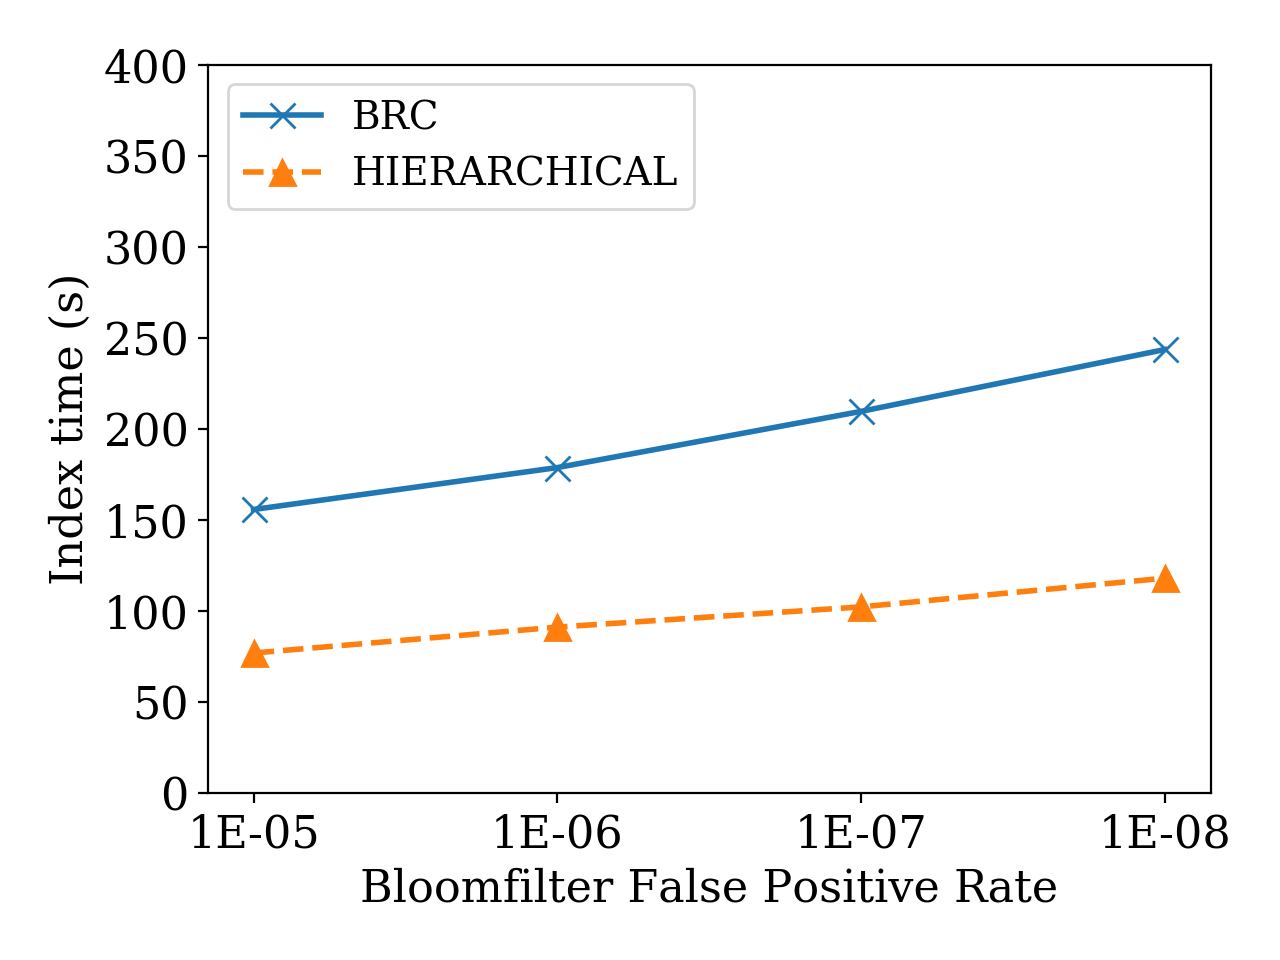

In [26]:
df_gowalla_LA_hxt_gen_index_seq_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_brc_shifted, delimiter='\t', index_col=False)
df_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted, delimiter='\t', index_col=False)
bytes_per_mb = 2 ** 20

n_checkins = 10000
bf_fprs = ['1E-05', '1E-06', '1E-07', '1E-08']

# index_limit_levels = [0, 5, 6, 7]
index_limit_level = 0
markers = ['x', '^', 's', 'o']

# widths = [1024, 8192, 65536]
# widths = [2**10, 2**12, 2**14, 2**16]
width = 2**10
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']

data = df_gowalla_LA_hxt_gen_index_seq_brc_shifted
data = data[data.n_checkins == n_checkins]
data = data[data.width == width]
data = data[data.index_limit_level == index_limit_level]
data = data['total_time']
label = 'BRC'
ls = linestyles[0]
marker = markers[0]
plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

data = df_gowalla_LA_hxt_gen_index_seq_hierarchical_shifted
data = data[data.n_checkins == n_checkins]
data = data[data.width == width]
data = data[data.index_limit_level == index_limit_level]
data = data['total_time']
label = 'HIERARCHICAL'
ls = linestyles[1]
marker = markers[1]
plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

    
axes = plt.gca()
axes.set_ylim([0, 400])
plt.xlabel('Bloomfilter False Positive Rate')
plt.ylabel('Index time (s)')
plt.legend(loc=2, ncol=1)
plt.xticks(bf_fprs)
# plt.title('HXT Index Size')
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hxt_index_time_vary_bf_fpr.eps')
plt.savefig('benchmark/charts/hxt_index_time_vary_bf_fpr.pdf')

## Query time - shifted

<IPython.core.display.Javascript object>


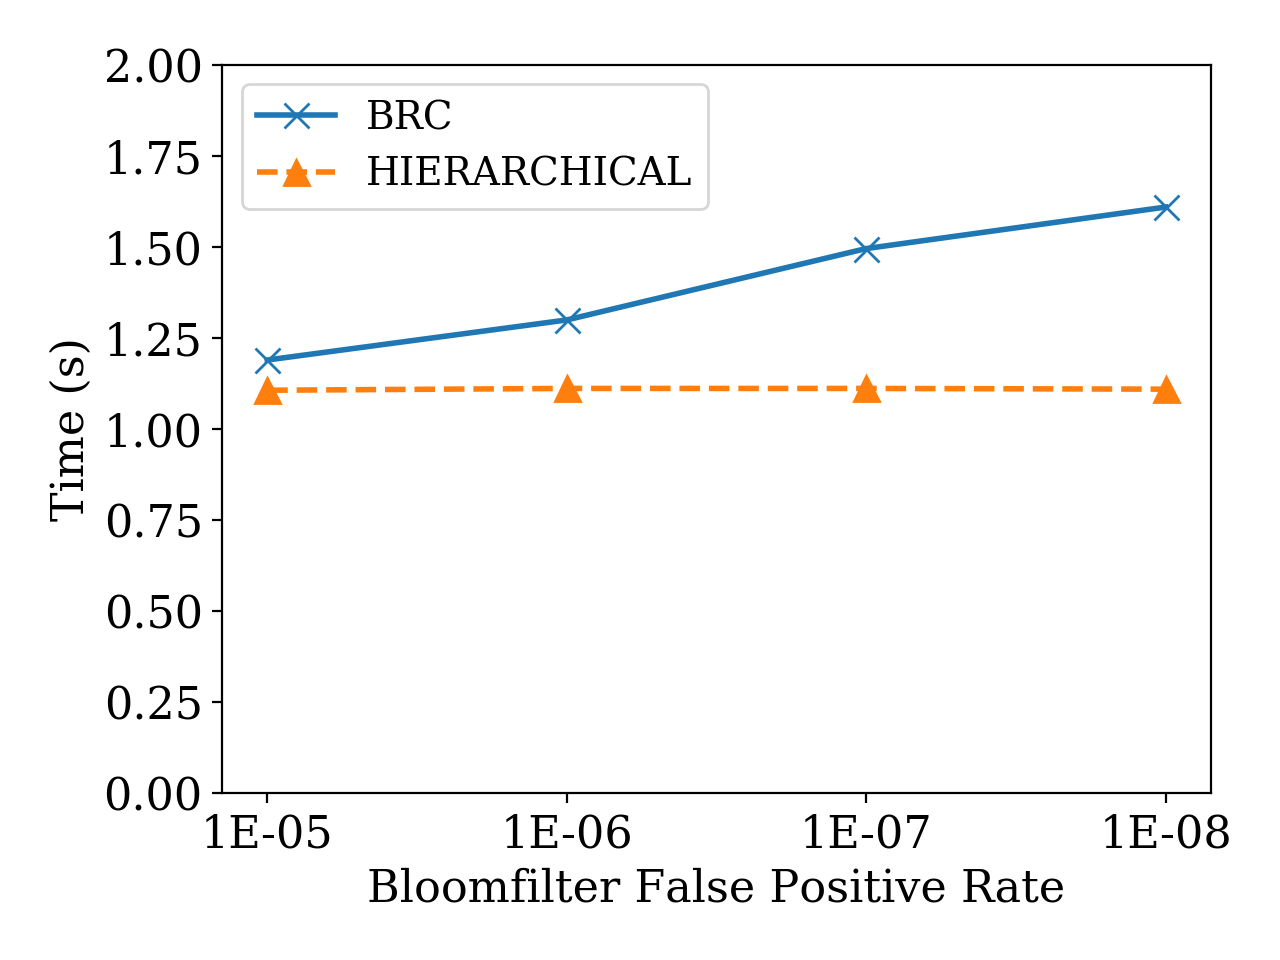

In [27]:
df_gowalla_LA_hxt_converted_from_hve_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted, delimiter='\t', index_col=False)
df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted, delimiter='\t', index_col=False)

n_checkins = 10000
query_level = 5
bf_fprs = ['1E-05', '1E-06', '1E-07', '1E-08']

index_limit_level = 0
markers = ['x', '^', 's', 'o']

width = 2**10
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']

data = df_gowalla_LA_hxt_converted_from_hve_brc_shifted
data = data[data.n_checkins == n_checkins]
data = data[data.query_level == query_level]
data = data[data.width == width]
data = data[data.index_limit_level == index_limit_level]
data = data['avg_time']
label = 'BRC'
ls = linestyles[0]
marker = markers[0]
plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

data = df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted
data = data[data.n_checkins == n_checkins]
data = data[data.query_level == query_level]
data = data[data.width == width]
data = data[data.index_limit_level == index_limit_level]
data = data['avg_time']
label = 'HIERARCHICAL'
ls = linestyles[1]
marker = markers[1]
plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

    
axes = plt.gca()
axes.set_ylim([0, 2])
plt.xlabel('Bloomfilter False Positive Rate')
plt.ylabel('Time (s)')
plt.legend(loc=2, ncol=1)
plt.xticks(bf_fprs)
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hxt_avg_query_time_vary_bf_fpr.eps')
plt.savefig('benchmark/charts/hxt_avg_query_time_vary_bf_fpr.pdf')

## Avg false positive rate

<IPython.core.display.Javascript object>


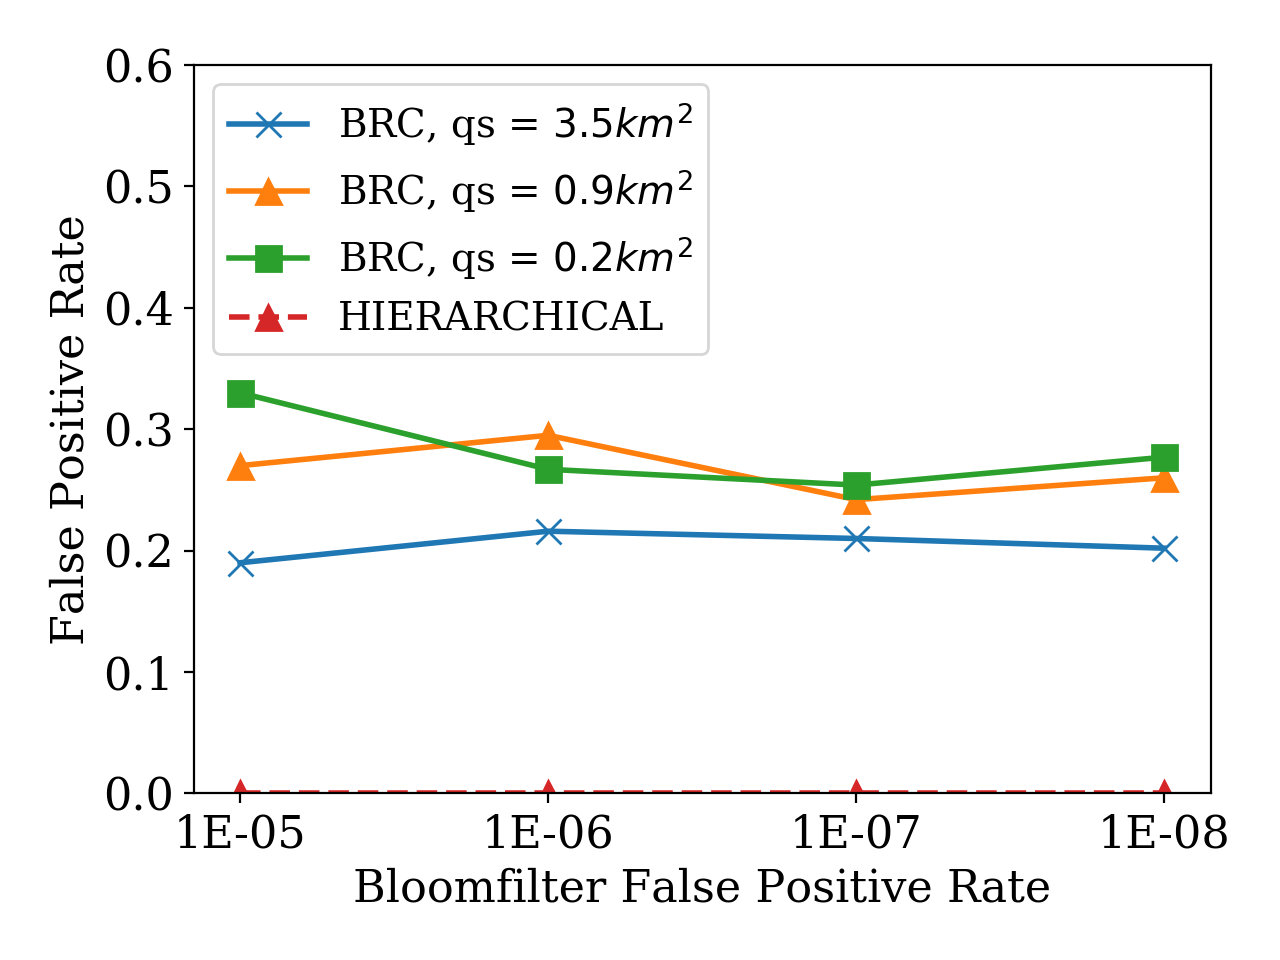

In [35]:
df_gowalla_LA_hxt_converted_from_hve_brc_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_brc_shifted, delimiter='\t', index_col=False)
df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted = pd.read_csv(benchmark_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted, delimiter='\t', index_col=False)

n_checkins = 10000

bf_fprs = ['1E-05', '1E-06', '1E-07', '1E-08']

index_limit_level = 0
markers = ['x', '^', 's', 'o']

width = 2**10
# linestyles = [ ':', '--', '-', '-.']
linestyles = [ '-', '--']

query_sizes = ['$3.5km^2$', '$0.9km^2$', '$0.2km^2$']
query_levels = [5, 6, 7]

for ql_i in range(len(query_levels)):
    query_level = query_levels[ql_i]
    query_size = query_sizes[ql_i]
    ls = linestyles[0]
    marker = markers[ql_i]
    
    data = df_gowalla_LA_hxt_converted_from_hve_brc_shifted
    data = data[data.n_checkins == n_checkins]
    data = data[data.query_level == query_level]
    data = data[data.width == width]
    data = data[data.index_limit_level == index_limit_level]
    data = data['avg_false_positive_rate']
    label = 'BRC, qs = {0}'.format(query_size)
    plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

data = df_gowalla_LA_hxt_converted_from_hve_hierarchical_shifted
data = data[data.n_checkins == n_checkins]
data = data[data.query_level == query_level]
data = data[data.width == width]
data = data[data.index_limit_level == index_limit_level]
data = data['avg_false_positive_rate']
label = 'HIERARCHICAL'
ls = linestyles[1]
marker = markers[1]
plt.plot(bf_fprs, data, ls + marker, label=label, markersize=9, linewidth=2)

    
axes = plt.gca()
axes.set_ylim([0, 0.6])
plt.xlabel('Bloomfilter False Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend(loc=2, ncol=1)
plt.xticks(bf_fprs)
plt.tight_layout()
plt.show()
plt.savefig('benchmark/charts/hxt_avg_false_positive_rate_vary_bf_fpr.eps')
plt.savefig('benchmark/charts/hxt_avg_false_positive_rate_vary_bf_fpr.pdf')